<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code> 5 </code><b>

<b>Group Members:</b>  

1. <code>Mansi_B00945329</code>
2. <code>Keyur_B00935171</code>
3. <code>Parth_B00931931</code>


# 1. Dataset Information

<h4> Dataset Name: <code>Adult</code></h4>
<h4> Link to the Dataset: <code>https://archive.ics.uci.edu/dataset/2/adult</code> </h4>
<h4> Dataset Description: </h4>
<code>Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.</code>


# 2. Task Information

<h4> Task Goal: <code>Perform analysis, EDA on data and train models with criteria listed</code></h4>
<h4> Task Description: </h4>
    <code>In this study, we conducted a comprehensive evaluation of four machine learning models—SVM, Random Forest, XGBoost, and Gradient Boosting Classifier—across various preprocessing scenarios involving PCA for dimensionality reduction and SMOTE for data balancing.</code>
<h4> Task Completed By: <code>Parth Mehta (B00931931)</code></h4>

# 3. Task Implementation: Coding

### Package Importation<a id='top'></a>

In [ ]:
import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from prettytable import PrettyTable

from sklearn.utils import resample
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

## Data Explanation

In [ ]:
# Column names
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race',
    'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

train_data_file_path = "/content/adult.data"
test_data_file_path = "/content/adult.test"

# Reading the 'adult.data' CSV file again with the corrected column names
adult_data_train = pd.read_csv(train_data_file_path, header=None, names=column_names)
adult_data_test = pd.read_csv(test_data_file_path, header=None, names=column_names)

# Display the first few rows of the dataframe to verify
adult_data_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

**Feature List**

**age:** (Feature, Integer) Represents the age of the individual. This is a continuous variable with no missing values.

**workclass:** (Feature, Categorical) Indicates the employment class of the individual, such as Private, Self-emp-not-inc, Federal-gov, etc. This is a categorical variable with some missing values.

**fnlwgt:** (Feature, Integer) This variable is also continuous with no missing values.

**education:** (Feature, Categorical) Describes the highest level of education attained by the individual, with categories like Bachelors, HS-grad, etc. This is a categorical variable with no missing values.

**education-num:** (Feature, Integer) A continuous representation of the education variable, without missing values.

**marital-status:** (Feature, Categorical) Indicates the marital status of the individual, with categories like Married-civ-spouse, Never-married, etc. It's categorical and has no missing values.

**occupation:** (Feature, Categorical) Describes the individual's occupation, with categories such as Tech-support, Sales, etc. This variable is categorical and has some missing values.

**relationship:** (Feature, Categorical) Indicates the individual's role in the family, like Husband, Not-in-family, etc. It's categorical with no missing values.

**race:** (Feature, Categorical) Represents the race of the individual, such as White, Asian-Pac-Islander, etc. This variable is categorical with no missing values.

**sex:** (Feature, Binary) Indicates the gender of the individual, either Female or Male. This variable has no missing values.

**capital-gain and capital-loss:** (Feature, Integer) Both are continuous variables representing the capital gains and losses of the individual, respectively, with no missing values.

**hours-per-week:** (Feature, Integer) Indicates the number of hours the individual works per week. This is a continuous variable with no missing values.

**native-country:** (Feature, Categorical) Represents the native country of the individual, with various countries listed. This is a categorical variable with some missing values.

**income:** (Target, Binary) The prediction target, indicating whether the individual's income is above or below 50K. It's binary with categories '>50K' and '<=50K', and has no missing values.

## Data Pre-Processing

### Check Missing Values

##### Train DataSet

In [ ]:
adult_data_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
# Checking for placeholders like '?' that might indicate missing values
# Specifically checking in 'workclass', 'occupation', and 'native-country' columns
missing_placeholders = adult_data_train[['workclass', 'occupation', 'native-country']].apply(lambda x: x.str.strip()).isin(['?'])

# Counting the number of '?' placeholders in these columns
missing_values_count = missing_placeholders.sum()
missing_values_percentage = (missing_placeholders.mean() * 100)

# Displaying the count and percentage of missing values for each of these columns
missing_data_info = pd.DataFrame({'Count': missing_values_count, 'Percentage': missing_values_percentage})
missing_data_info

,Count,Percentage
workclass,1836,5.638647
occupation,1843,5.660146
native-country,583,1.790486


In [ ]:
# Removing rows where 'workclass', 'occupation', or 'native-country' have missing values (indicated by '?')
cleaned_data = adult_data_train[
    (adult_data_train['workclass'].str.strip() != '?') &
    (adult_data_train['occupation'].str.strip() != '?') &
    (adult_data_train['native-country'].str.strip() != '?')
]

# Checking the shape of the dataset before and after deletion
original_shape = adult_data_train.shape
cleaned_shape = cleaned_data.shape

original_shape, cleaned_shape

((32561, 15), (30162, 15))

##### Test DataSet

In [ ]:
# Removing rows where 'workclass', 'occupation', or 'native-country' have missing values (indicated by '?')
cleaned_data_test = adult_data_test.iloc[1:][
    (adult_data_test['workclass'].str.strip() != '?') &
    (adult_data_test['occupation'].str.strip() != '?') &
    (adult_data_test['native-country'].str.strip() != '?')
]

<ipython-input-6-220598729a83>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data_test = adult_data_test.iloc[1:][


In [ ]:
cleaned_data_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

#### Check Duplicated Values

In [ ]:
# Checking for duplicated rows in the cleaned dataset
duplicate_rows = cleaned_data.duplicated().sum()

duplicate_rows

23

In [ ]:
# Removing duplicate rows from the dataset
cleaned_data_no_duplicates = cleaned_data.drop_duplicates()

cleaned_data_no_duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Exploratory Data Analysis (EDA)

### Visualization

In [ ]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

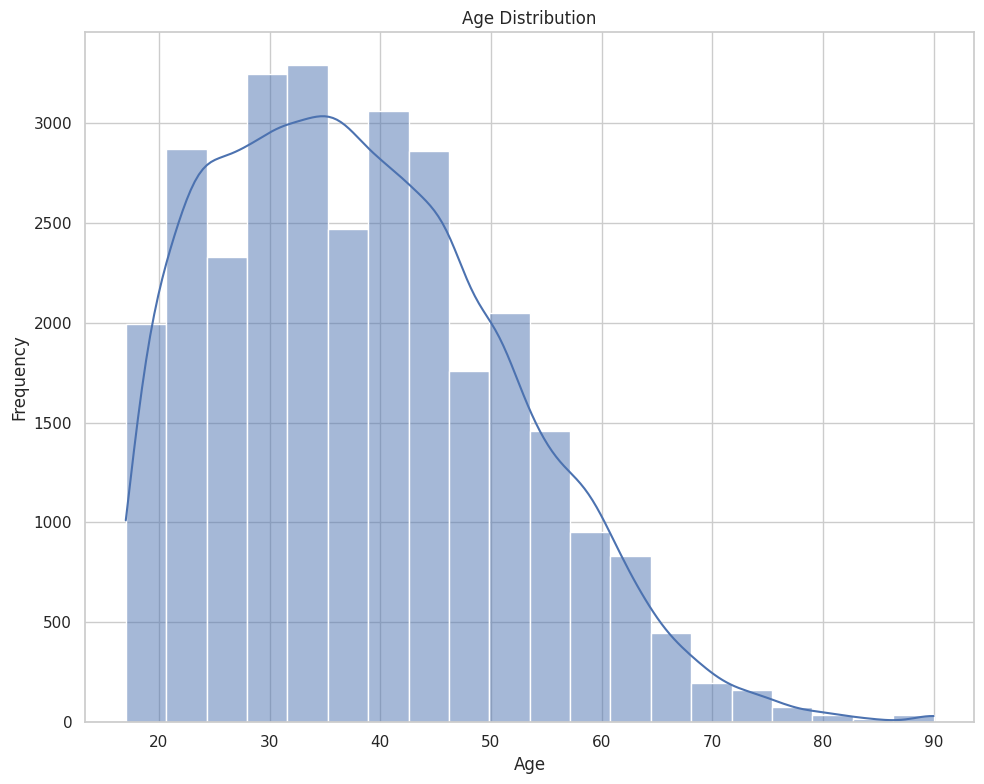

In [ ]:
# Age Distribution
plt.figure(figsize=(10, 8))
sns.histplot(cleaned_data_no_duplicates['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

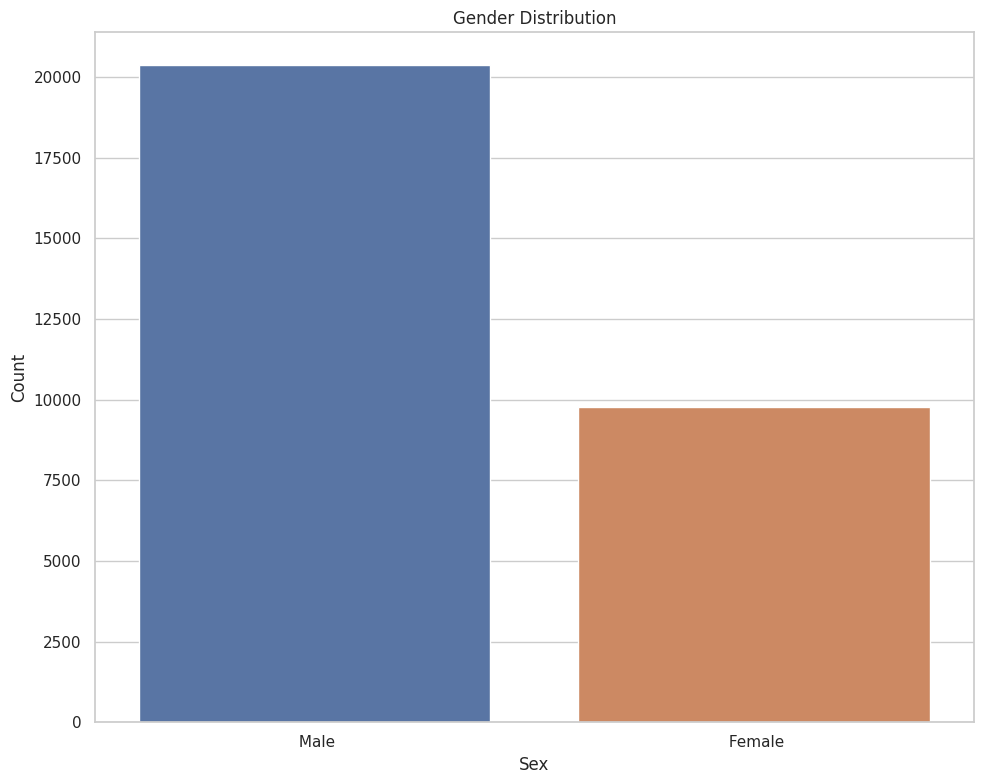

In [ ]:
# Gender Distribution
plt.figure(figsize=(10, 8))
sns.countplot(x='sex', data=cleaned_data_no_duplicates)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

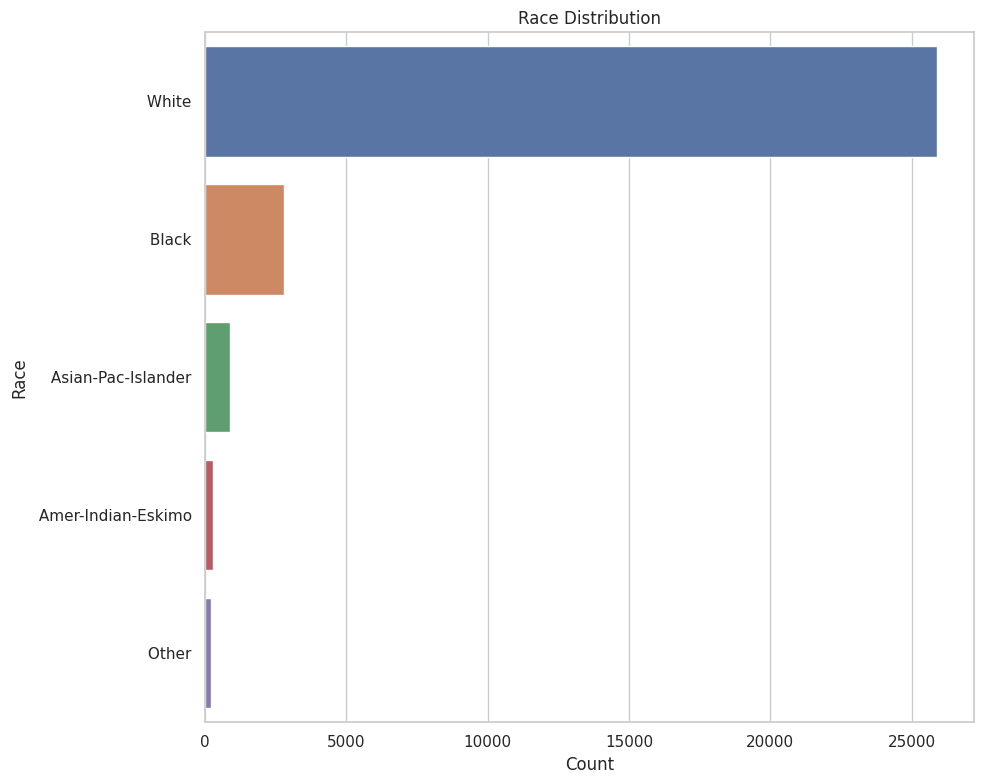

In [ ]:
# Race Distribution
plt.figure(figsize=(10, 8))
sns.countplot(y='race', data=cleaned_data_no_duplicates)
plt.title('Race Distribution')
plt.xlabel('Count')
plt.ylabel('Race')
plt.tight_layout()
plt.show()

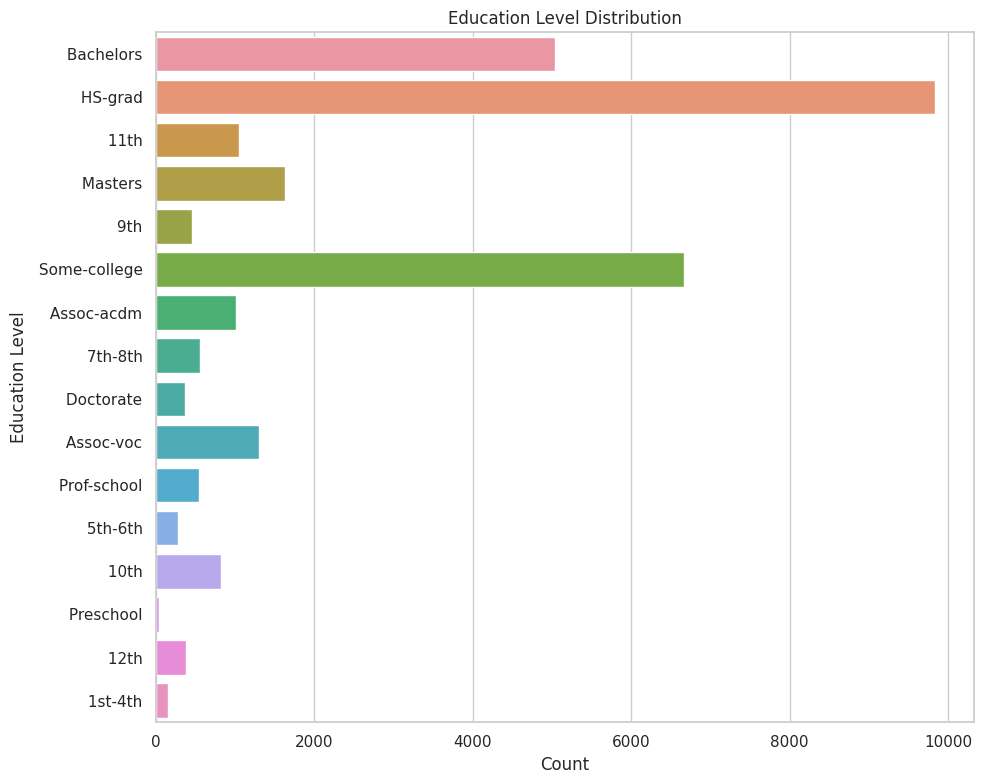

In [ ]:
# Education Level Distribution
plt.figure(figsize=(10, 8))
sns.countplot(y='education', data=cleaned_data_no_duplicates)
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

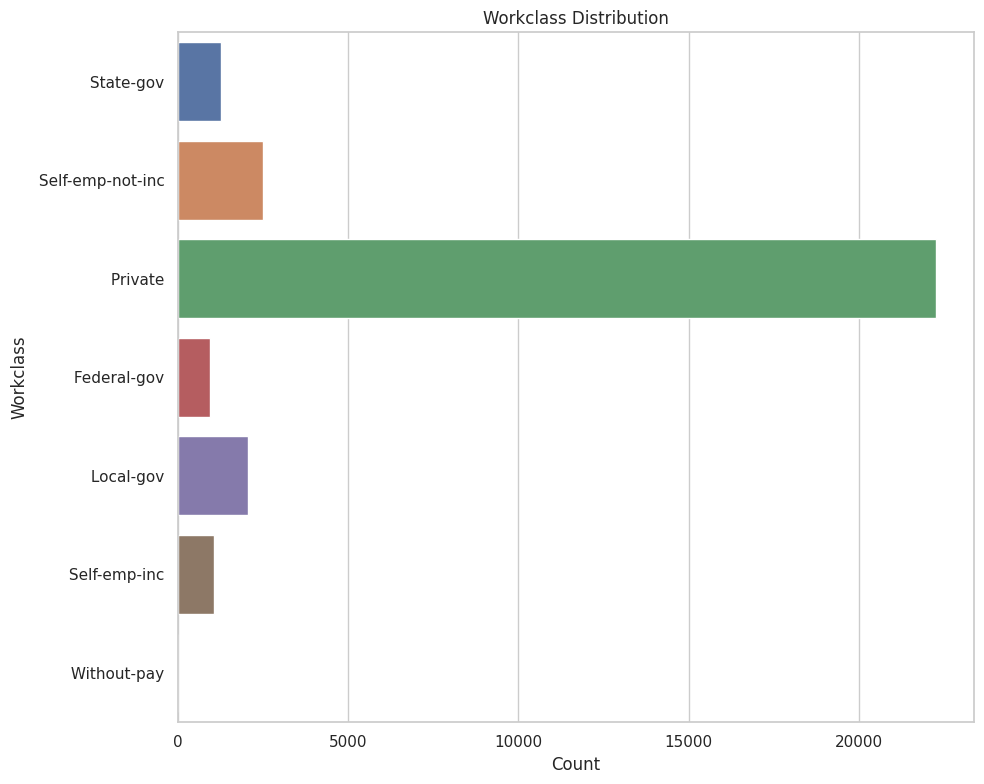

In [ ]:
# Workclass Distribution
plt.figure(figsize=(10, 8))
sns.countplot(y='workclass', data=cleaned_data_no_duplicates)
plt.title('Workclass Distribution')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.tight_layout()
plt.show()

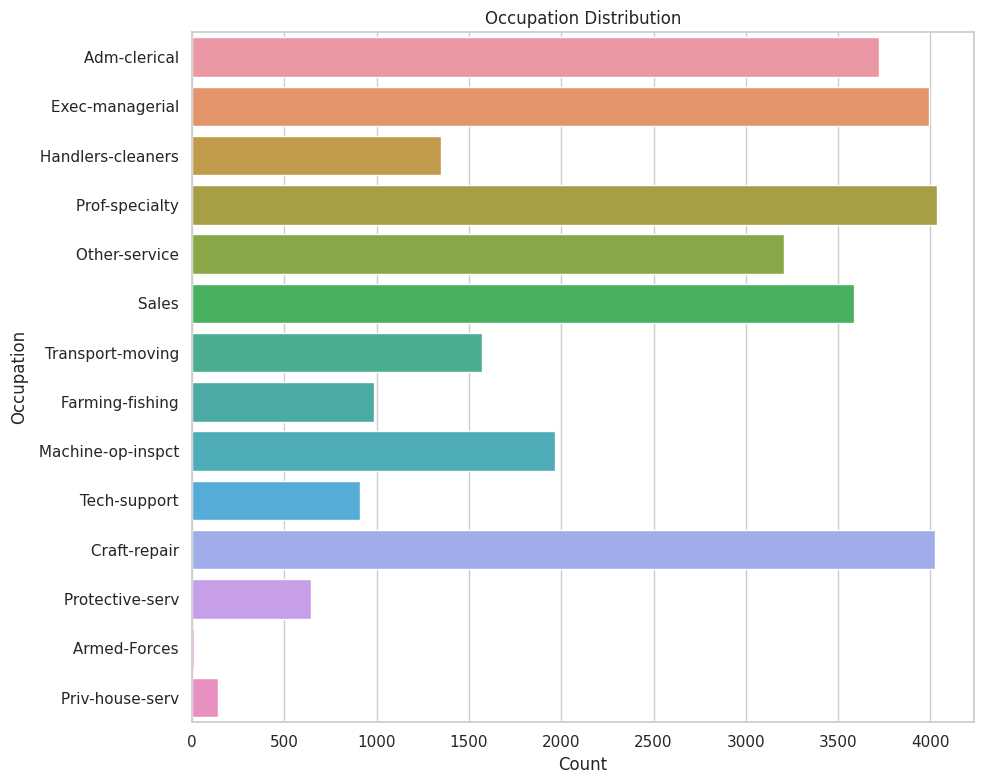

In [ ]:
# Occupation Distribution
plt.figure(figsize=(10, 8))
sns.countplot(y='occupation', data=cleaned_data_no_duplicates)
plt.title('Occupation Distribution')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

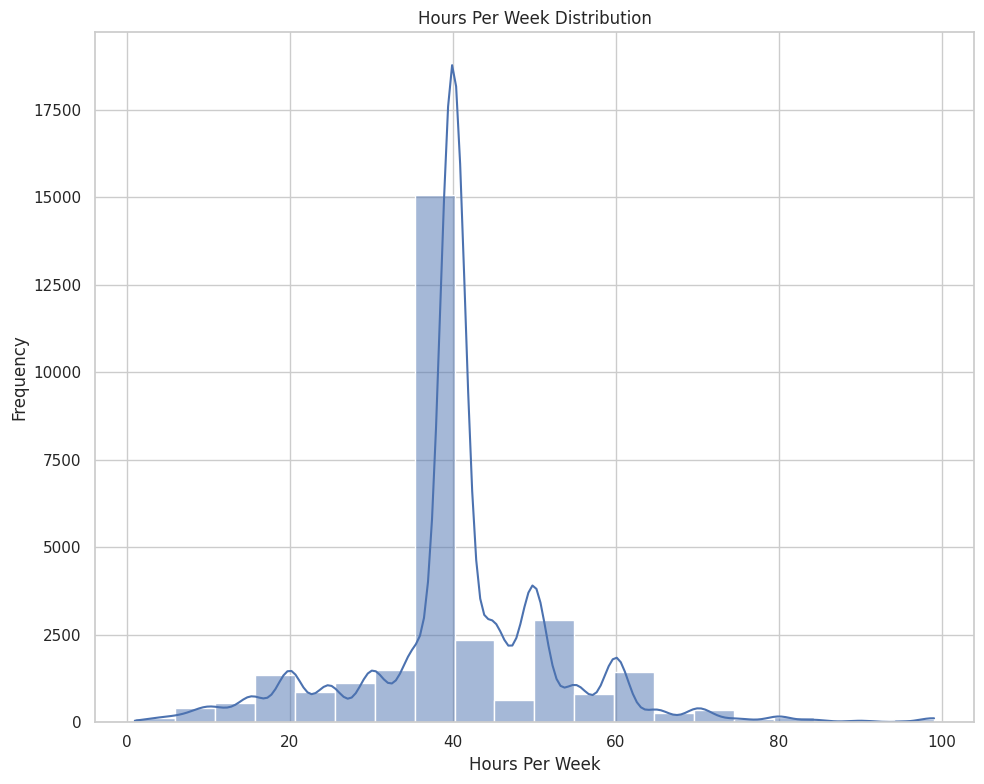

In [ ]:
# Hours Per Week Distribution
plt.figure(figsize=(10, 8))
sns.histplot(cleaned_data_no_duplicates['hours-per-week'], bins=20, kde=True)
plt.title('Hours Per Week Distribution')
plt.xlabel('Hours Per Week')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

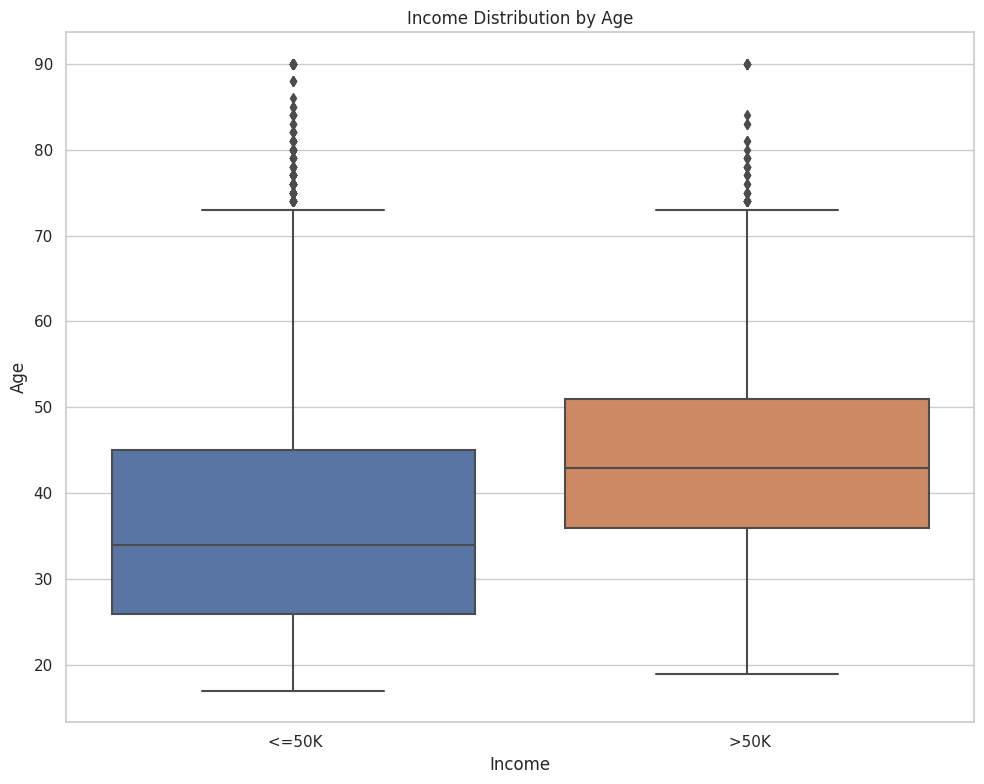

In [ ]:
# Income Distribution by Age
plt.figure(figsize=(10, 8))
sns.boxplot(x='income', y='age', data=cleaned_data_no_duplicates)
plt.title('Income Distribution by Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

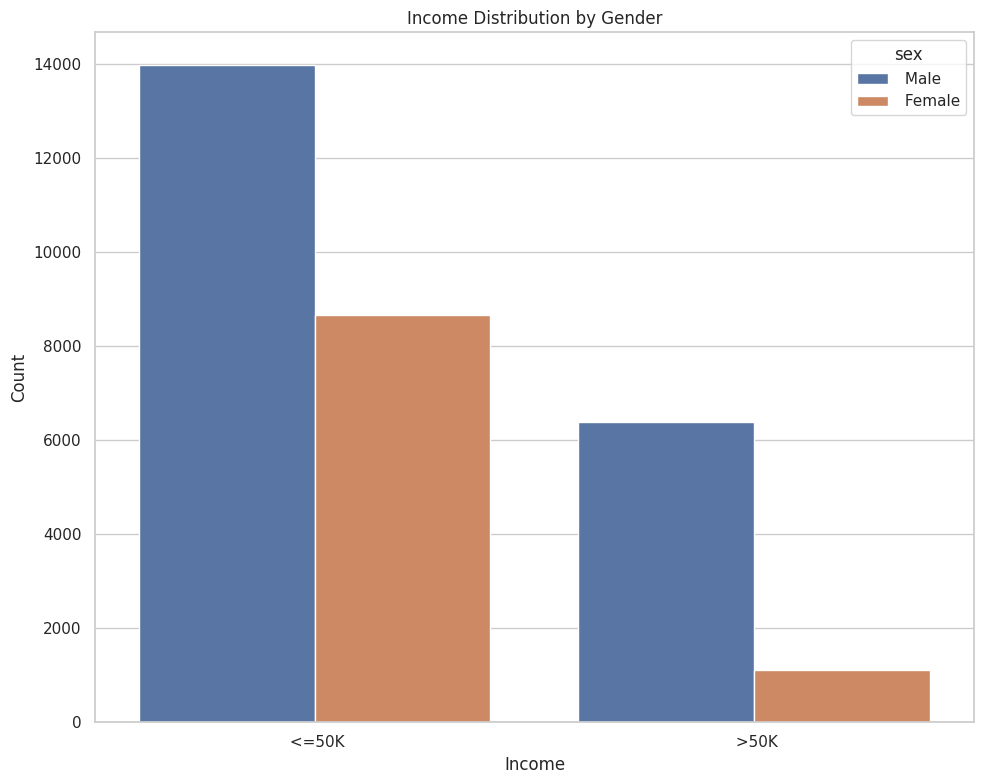

In [ ]:
# Income Distribution by Gender
plt.figure(figsize=(10, 8))
sns.countplot(x='income', hue='sex', data=cleaned_data_no_duplicates)
plt.title('Income Distribution by Gender')
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

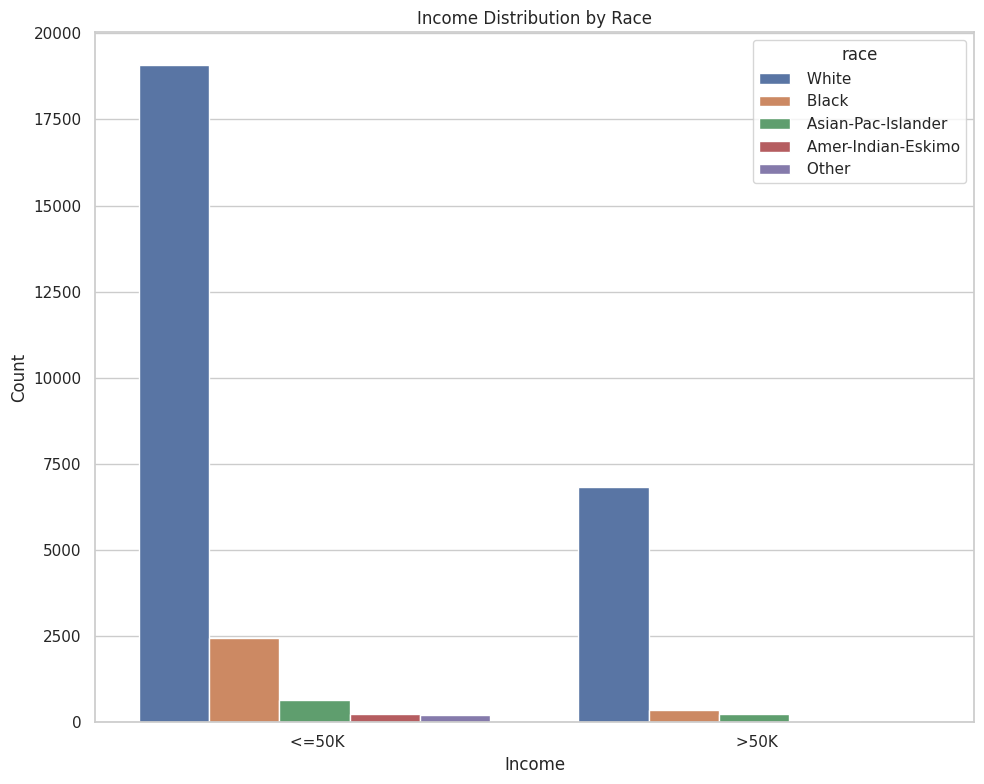

In [ ]:
# Income Distribution by Race
plt.figure(figsize=(10, 8))
sns.countplot(x='income', hue='race', data=cleaned_data_no_duplicates)
plt.title('Income Distribution by Race')
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

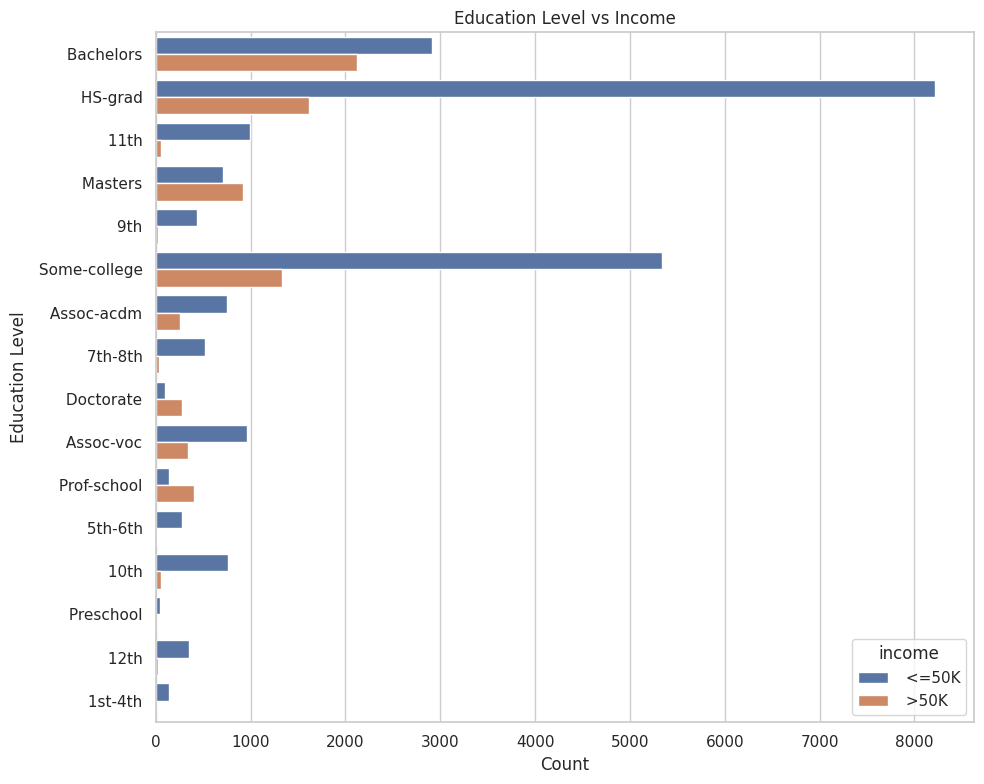

In [ ]:
# Education Level vs Income
plt.figure(figsize=(10, 8))
sns.countplot(y='education', hue='income', data=cleaned_data_no_duplicates)
plt.title('Education Level vs Income')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

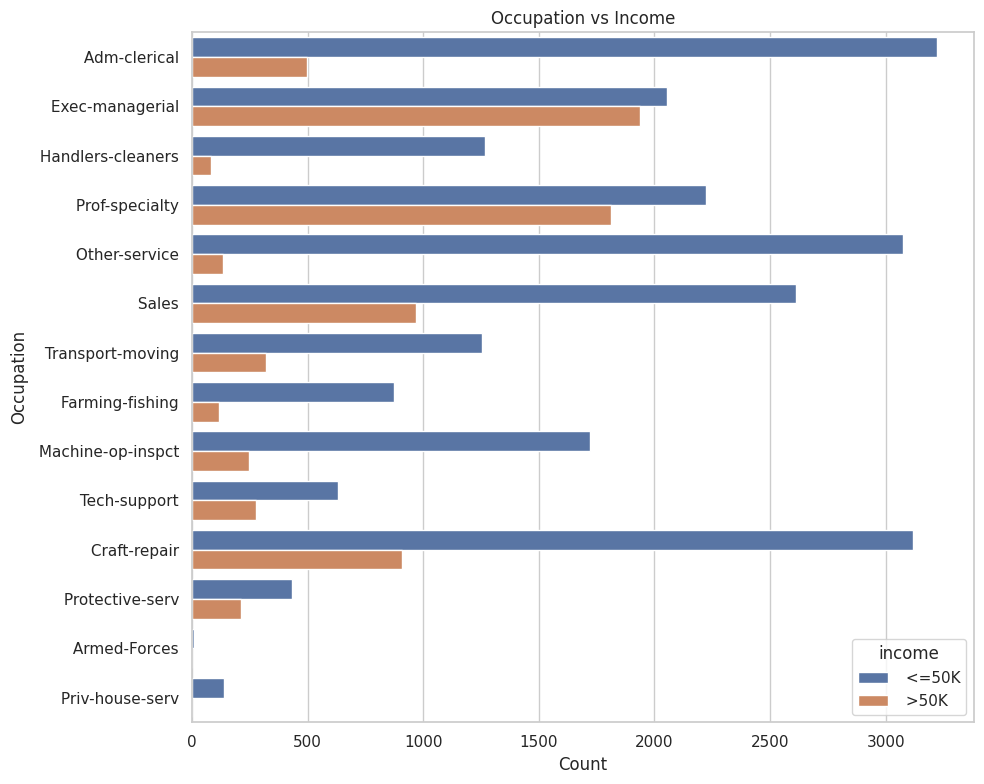

In [ ]:
# Occupation vs Income
plt.figure(figsize=(10, 8))
sns.countplot(y='occupation', hue='income', data=cleaned_data_no_duplicates)
plt.title('Occupation vs Income')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

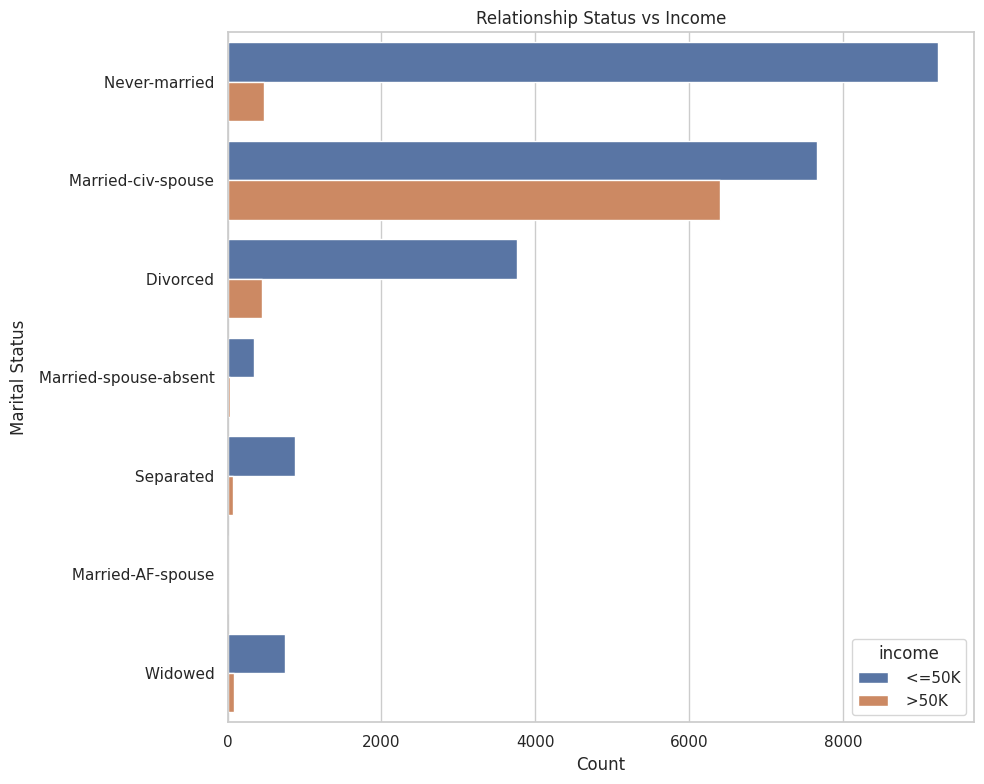

In [ ]:
# Relationship Status vs Income
plt.figure(figsize=(10, 8))
sns.countplot(y='marital-status', hue='income', data=cleaned_data_no_duplicates)
plt.title('Relationship Status vs Income')
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.tight_layout()
plt.show()

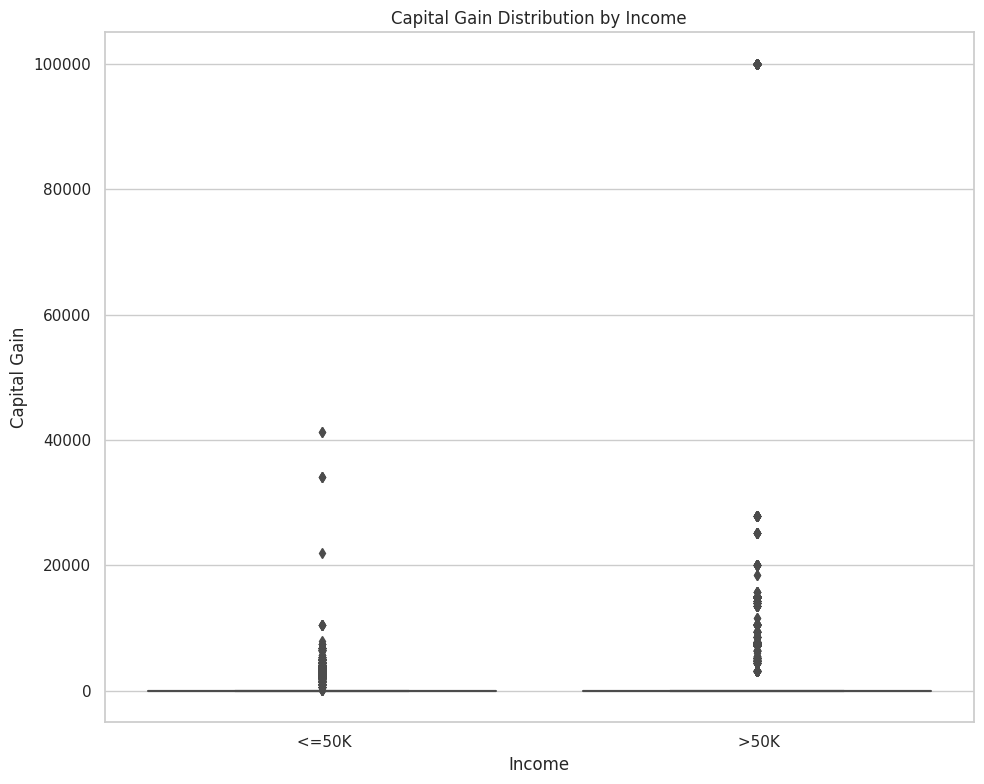

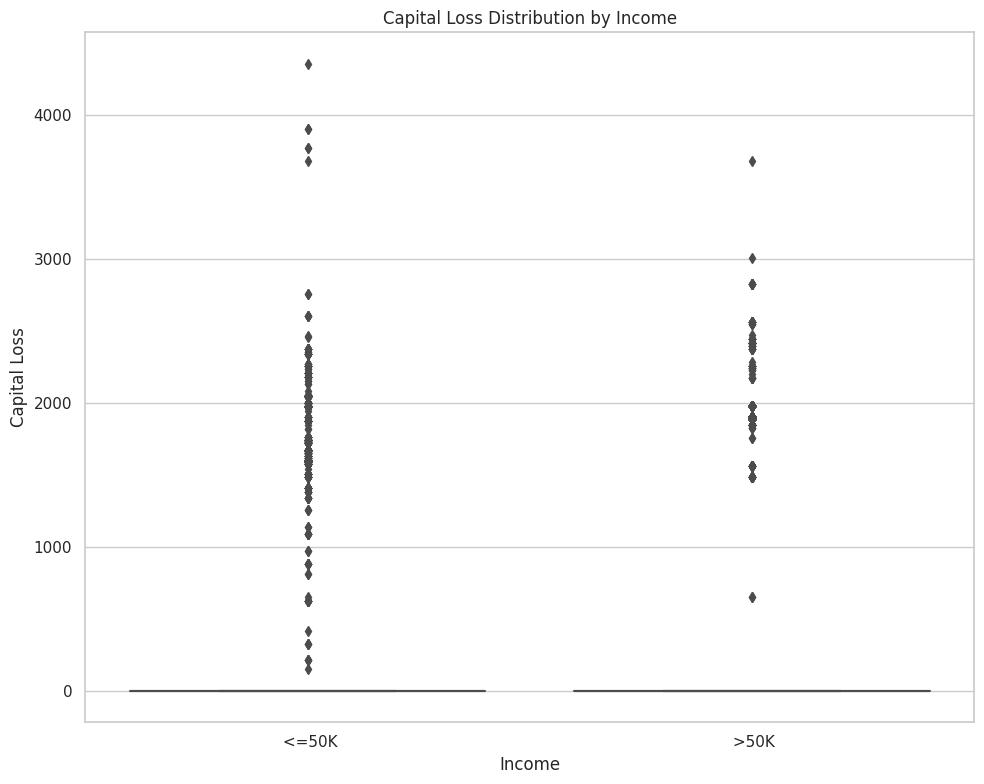

In [ ]:
# Capital Gain and Capital Loss Distribution
plt.figure(figsize=(10, 8))
sns.boxplot(x='income', y='capital-gain', data=cleaned_data_no_duplicates)
plt.title('Capital Gain Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Capital Gain')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='income', y='capital-loss', data=cleaned_data_no_duplicates)
plt.title('Capital Loss Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Capital Loss')
plt.tight_layout()
plt.show()

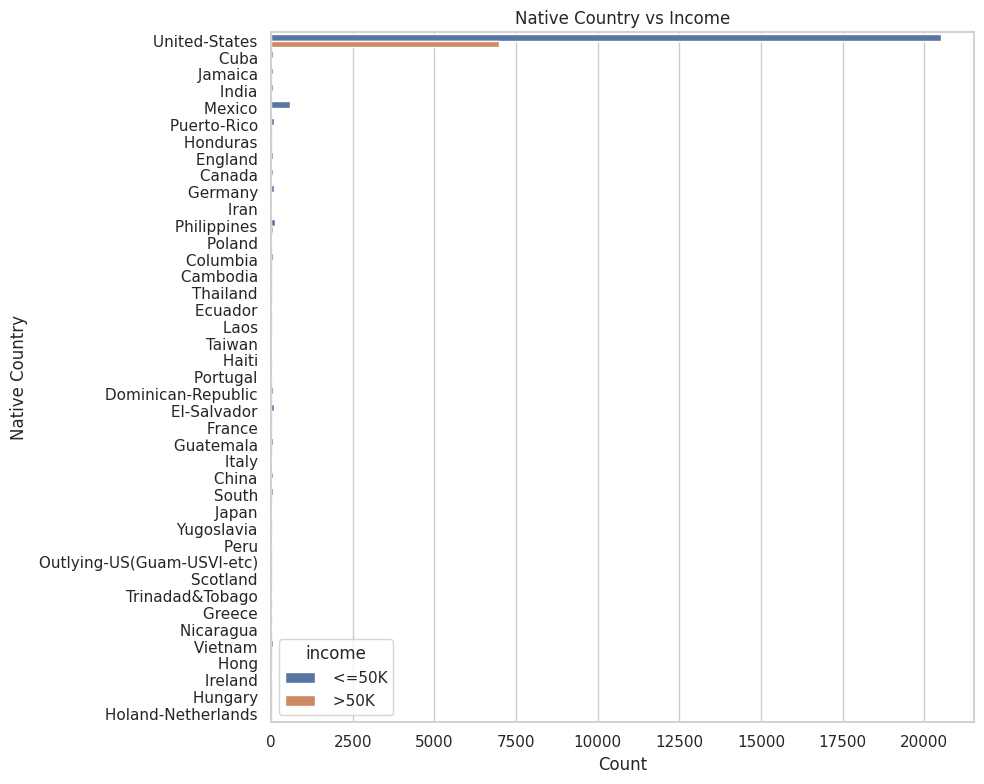

In [ ]:
# Native Country vs Income
plt.figure(figsize=(10, 8))
sns.countplot(y='native-country', hue='income', data=cleaned_data_no_duplicates)
plt.title('Native Country vs Income')
plt.xlabel('Count')
plt.ylabel('Native Country')
plt.tight_layout()
plt.show()

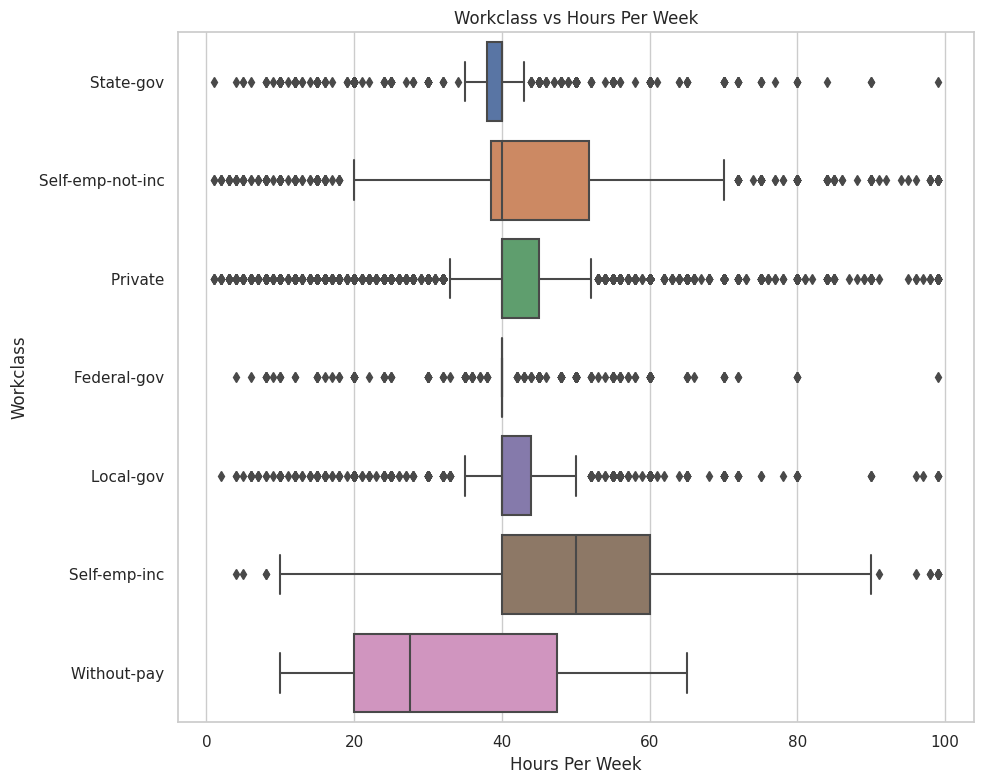

In [ ]:
# Workclass vs Hours Per Week
plt.figure(figsize=(10, 8))
sns.boxplot(x='hours-per-week', y='workclass', data=cleaned_data_no_duplicates)
plt.title('Workclass vs Hours Per Week')
plt.xlabel('Hours Per Week')
plt.ylabel('Workclass')
plt.tight_layout()
plt.show()

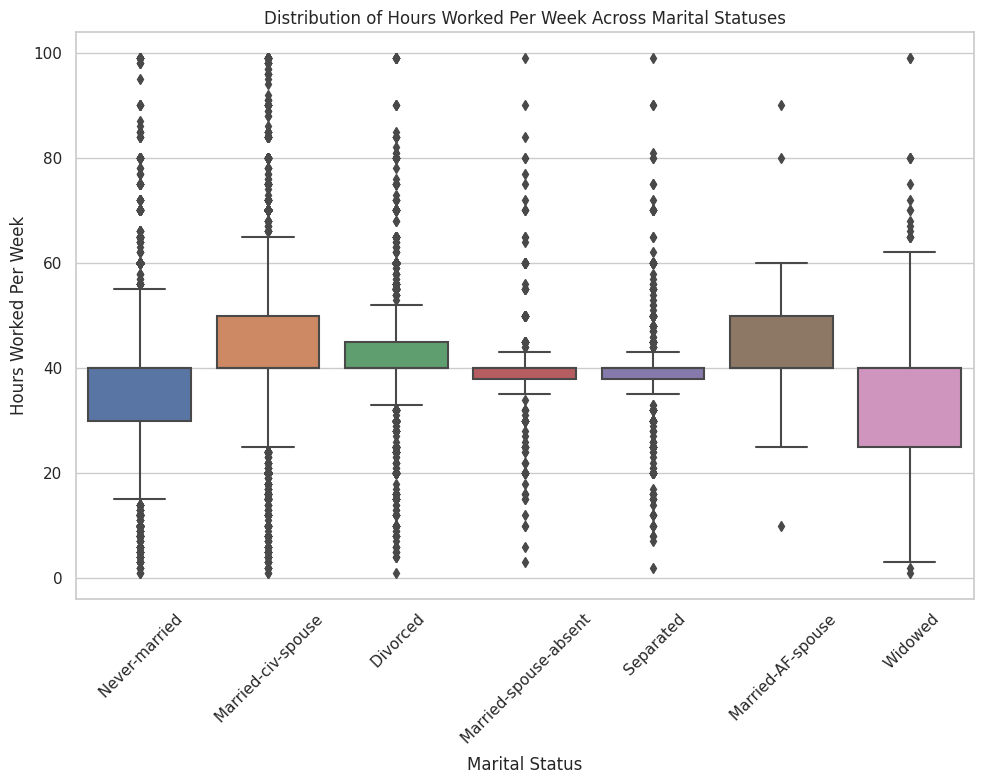

In [ ]:
# Marital Status vs Hours Per Week
plt.figure(figsize=(10, 8))
sns.boxplot(x='marital-status', y='hours-per-week', data=cleaned_data_no_duplicates)
plt.title('Distribution of Hours Worked Per Week Across Marital Statuses')
plt.xticks(rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Hours Worked Per Week')
plt.tight_layout()
plt.show()

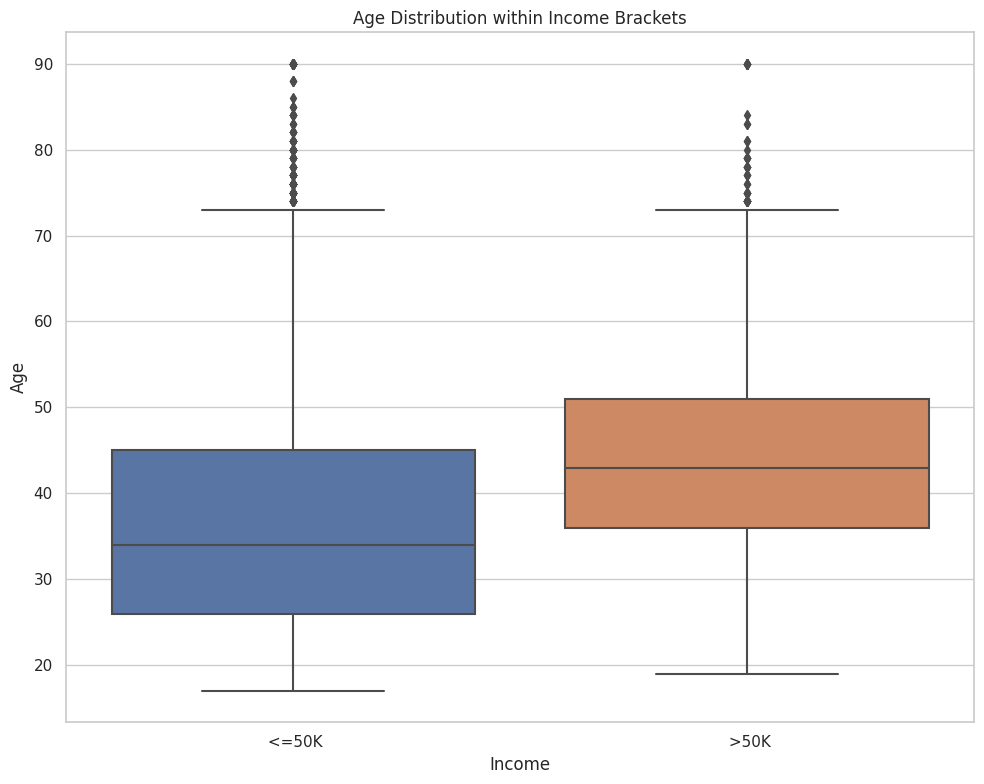

In [ ]:
# Age Distribution within Income Brackets
plt.figure(figsize=(10, 8))
sns.boxplot(x='income', y='age', data=cleaned_data_no_duplicates)
plt.title('Age Distribution within Income Brackets')
plt.xlabel('Income')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

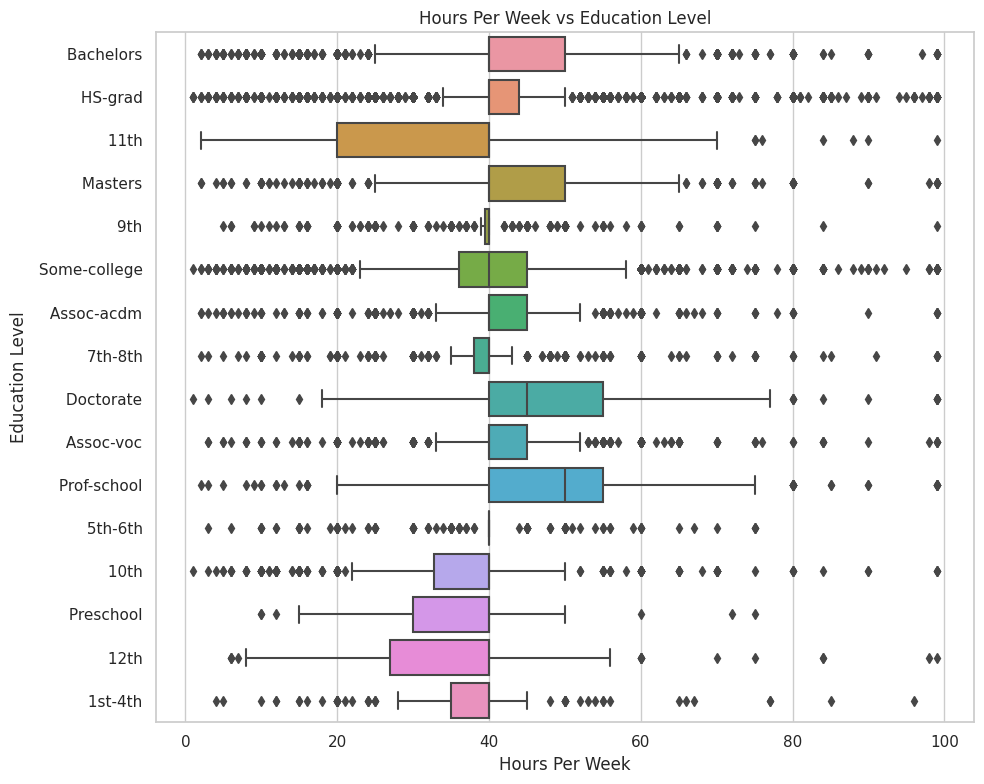

In [ ]:
# Hours Per Week vs Education Level
plt.figure(figsize=(10, 8))
sns.boxplot(x='hours-per-week', y='education', data=cleaned_data_no_duplicates)
plt.title('Hours Per Week vs Education Level')
plt.xlabel('Hours Per Week')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

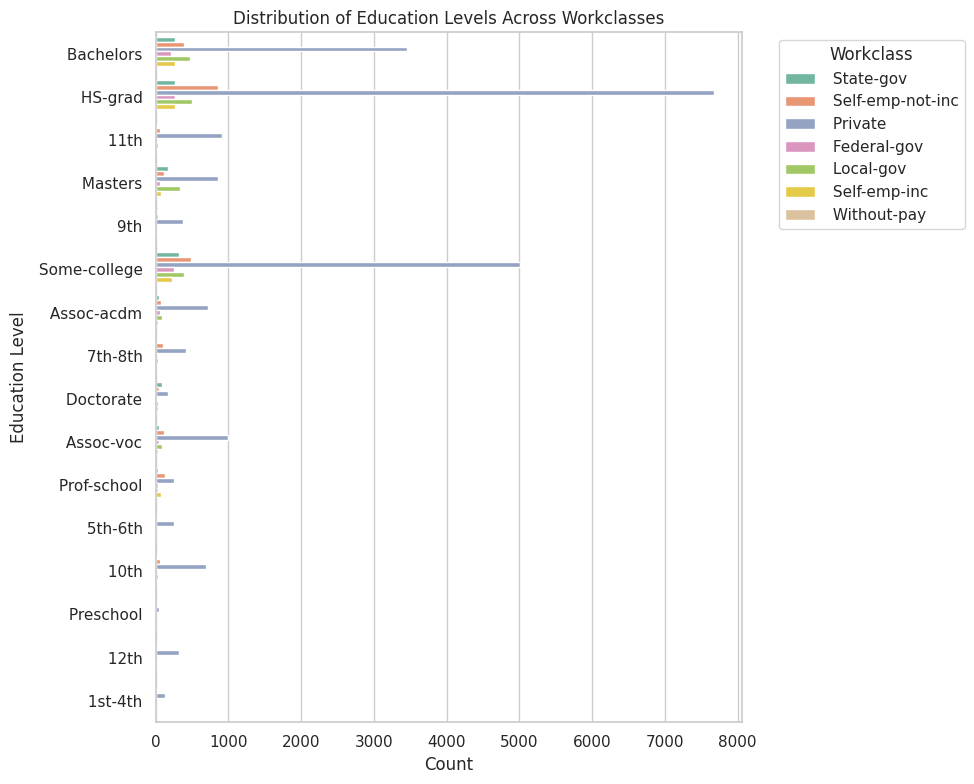

In [ ]:
# Workclass vs Education Level
plt.figure(figsize=(10, 8))
sns.countplot(y='education', hue='workclass', data=cleaned_data_no_duplicates, palette='Set2')
plt.title('Distribution of Education Levels Across Workclasses')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.legend(title='Workclass', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

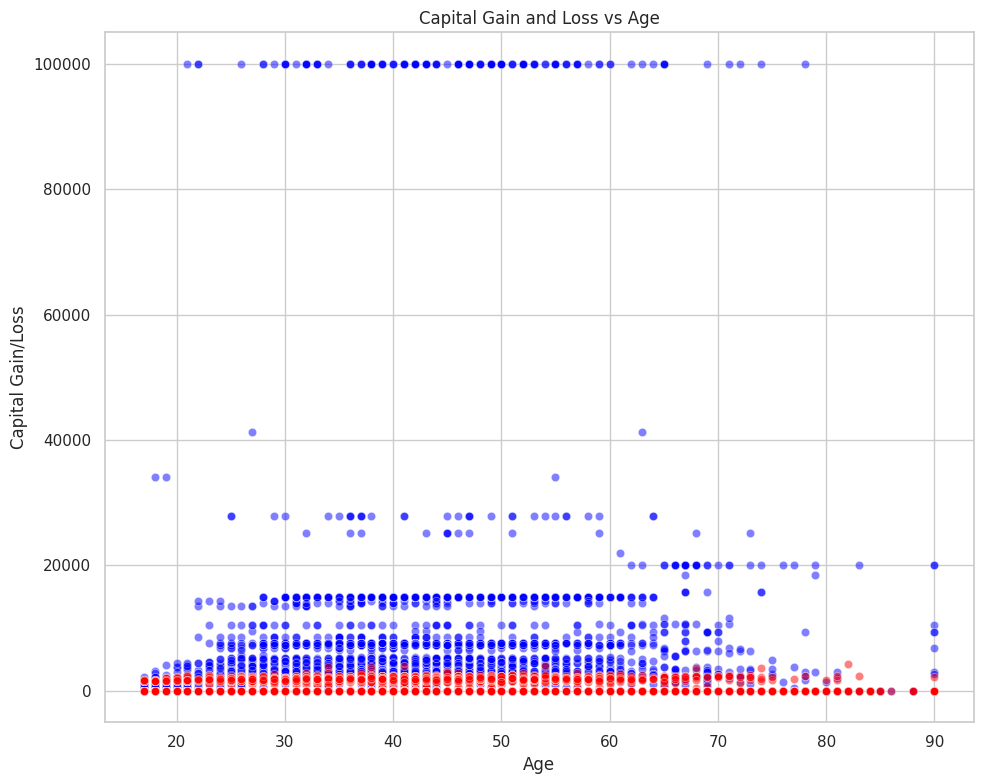

In [ ]:
# Capital Gain and Loss vs Age
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='capital-gain', data=cleaned_data_no_duplicates, color='blue', alpha=0.5)
sns.scatterplot(x='age', y='capital-loss', data=cleaned_data_no_duplicates, color='red', alpha=0.5)
plt.title('Capital Gain and Loss vs Age')
plt.xlabel('Age')
plt.ylabel('Capital Gain/Loss')
plt.tight_layout()
plt.show()

In [ ]:
heatmap_df = cleaned_data_no_duplicates.copy()

categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

# Apply label encoding for simplicity
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    heatmap_df[col] = le.fit_transform(cleaned_data_no_duplicates[col])
    label_encoders[col] = le  # Store the label encoder for each column

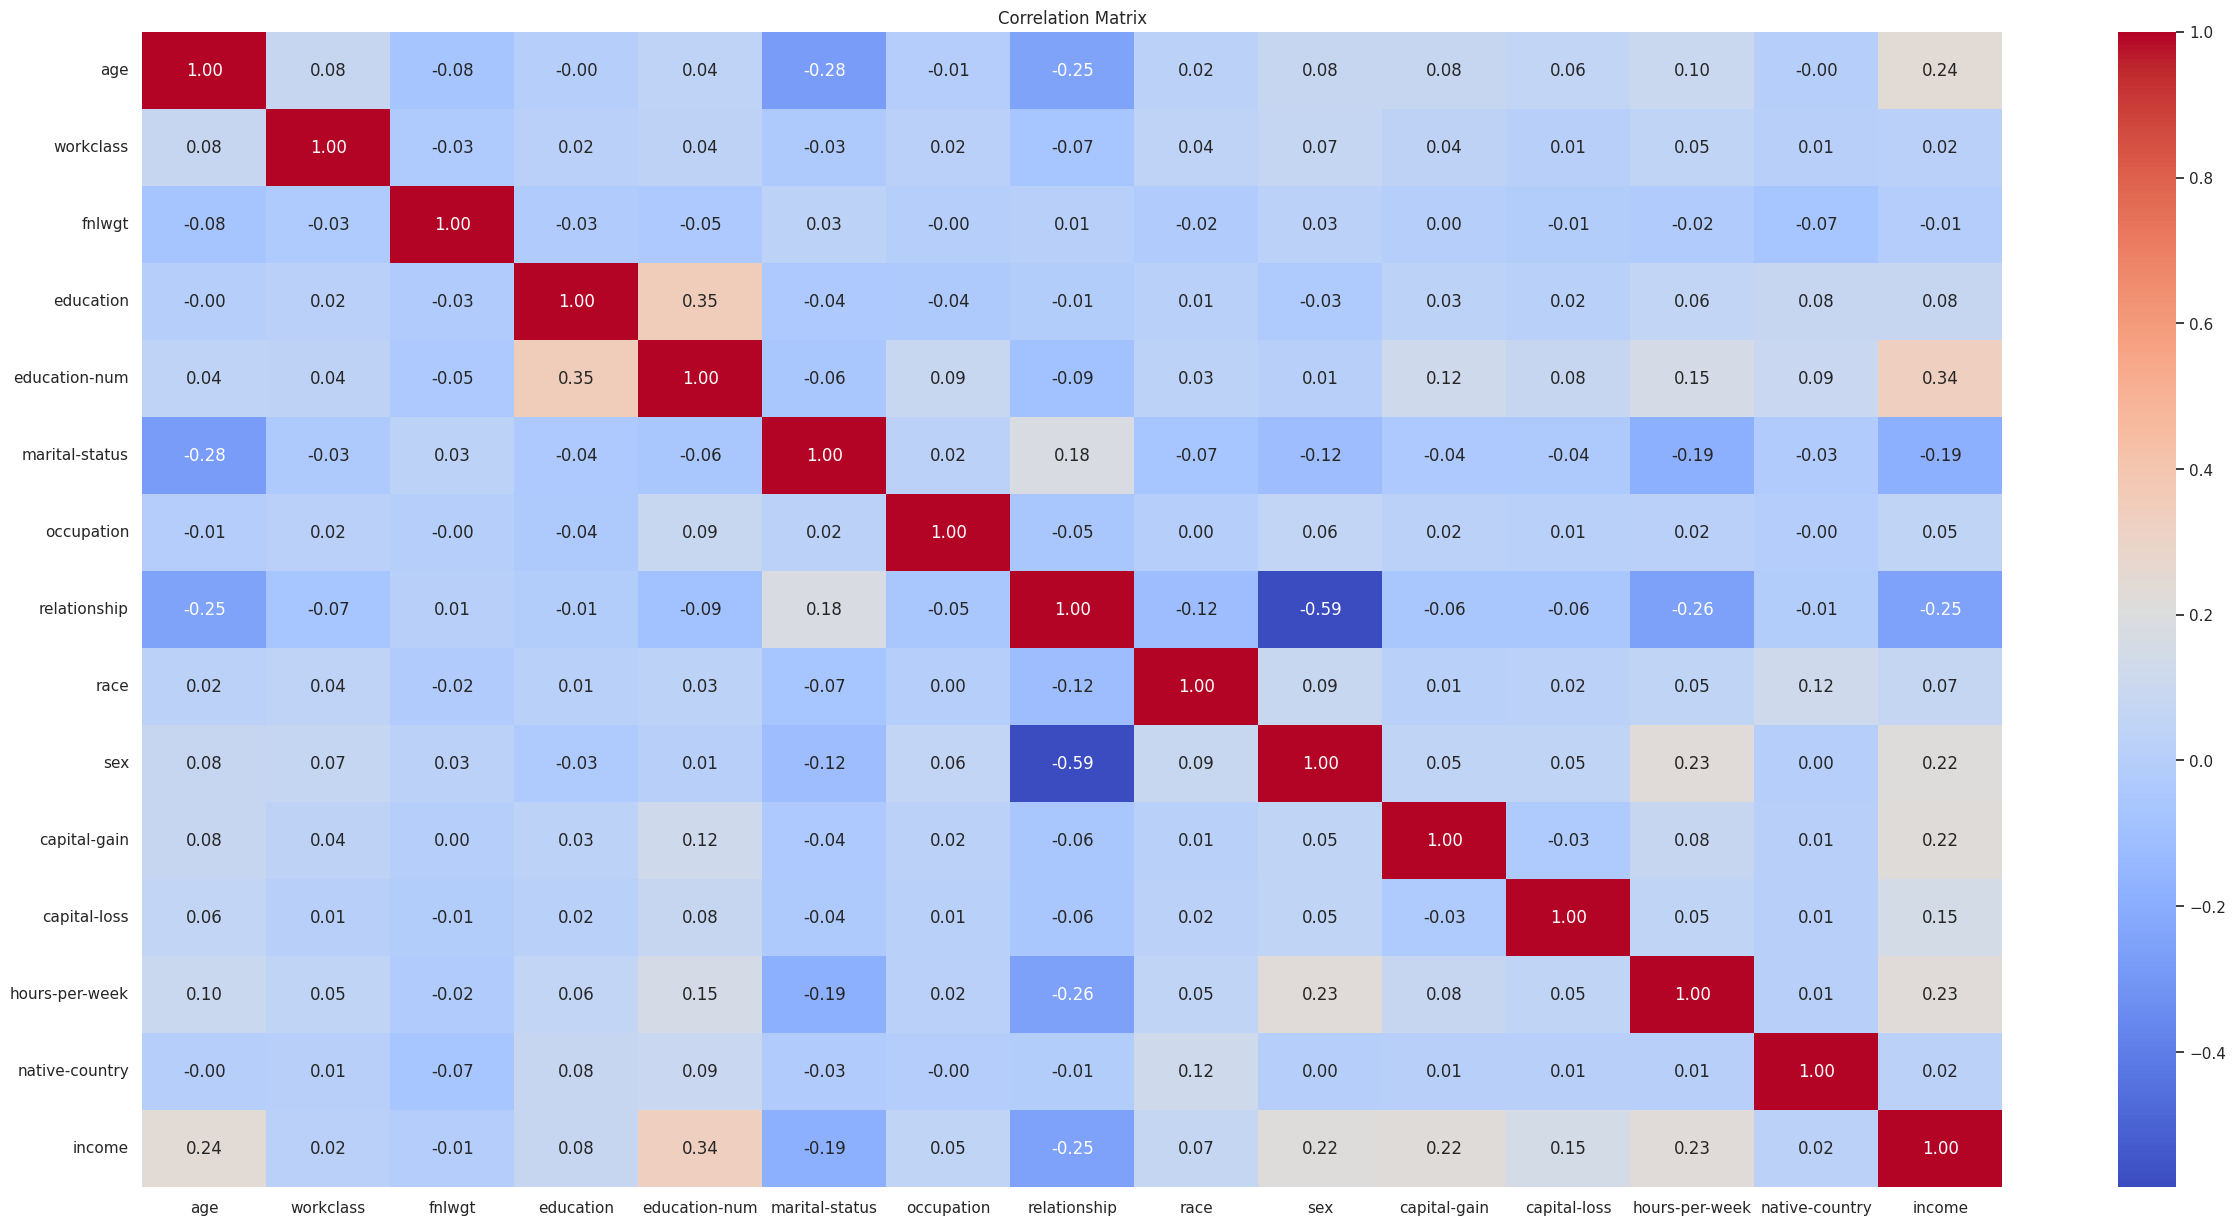

In [ ]:
# Creating a correlation matrix for the dataset
correlation_matrix = heatmap_df.corr()

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

1. Income Distribution by Gender:
- There appears to be a significant gender disparity in income levels. A larger proportion of males are in the >50K income category compared to females. This could indicate a gender pay gap or differences in the types of occupations between genders.

2. Income Distribution by Race:
- Certain racial groups, such as White and Asian-Pac-Islander, have a higher representation in the >50K income bracket. This might reflect socio-economic factors, educational backgrounds, or job market disparities affecting different races.

3. Education Level vs Income:
- Higher education levels generally correlate with higher income brackets. For instance, individuals with 'Bachelors', 'Masters', or 'Doctorate' degrees are more likely to be in the >50K income group. This highlights the impact of education on earning potential.

4. Occupation vs Income:
- Some occupations, like 'Exec-managerial' and 'Prof-specialty', have a higher proportion of individuals earning >50K. In contrast, occupations like 'Handlers-cleaners' and 'Other-service' are predominantly in the <=50K income bracket. This indicates the varying economic value associated with different types of jobs.

5. Relationship Status vs Income:
- Individuals who are 'Married-civ-spouse' are more likely to be in the >50K income bracket, suggesting that marital status, possibly combined with dual incomes, impacts overall earnings. On the other hand, those who have never been married or are divorced have a higher representation in the <=50K category.

6. Capital Gain and Capital Loss Distribution by Income:
- For Capital Gain: Higher capital gains are associated with the >50K income group. This implies that individuals with higher incomes also have higher investment earnings.
- For Capital Loss: The distribution of capital losses is somewhat similar across income groups, although the >50K group has a slightly wider range, indicating varied investment outcomes.

7. Native Country vs Income:
- There is a noticeable variation in income levels based on native country. This could reflect factors like immigration patterns, educational qualifications from different countries, and the economic opportunities available to individuals from these countries in the U.S. job market.

8. Workclass vs Hours Per Week:
- There's a variation in the typical work week across workclasses. For example, 'Self-emp-inc' individuals tend to have a wider range of working hours, indicating variability in their work schedules. In contrast, 'State-gov' and 'Local-gov' employees show a more concentrated range around the standard 40-hour workweek.

9. Marital Status vs Hours Per Week:
- Categories like 'Married-civ-spouse' and 'Divorced' exhibit a broader range of hours, indicating varied work schedules among these groups. 'Widowed' and 'Separated' categories show a relatively lower median, which might suggest a reduction in work hours due to personal circumstances.

10. Age Distribution within Income Brackets:
- Individuals in the >50K income bracket tend to be older, which might indicate that higher earnings correlate with increased experience and age. The <=50K group has a younger median age, which could be due to entry-level positions or early career stages.

11. Hours Per Week vs Education Level:
- Higher education levels do not necessarily correlate with longer working hours. For example, individuals with 'Doctorate' or 'Prof-school' degrees do not work significantly more hours than those with a high school education, suggesting that higher qualifications may lead to more efficient, higher-paying roles rather than longer hours.

12. Workclass vs Education Level:
- The prevalence of individuals with 'Bachelors' and higher degrees (like 'Masters' and 'Doctorate') is more noticeable in workclasses such as 'Federal-gov' and 'State-gov'. This could imply higher educational qualifications are more sought after or required in government jobs. The 'Private' workclass shows a broad range of education levels, reflecting the wide variety of jobs available in the private sector that cater to different educational qualifications. Categories like 'Without-pay' and 'Never-worked' have significantly lower counts across all education levels, indicating these workclasses are less common or less reported in the dataset.

13. Capital Gain and Loss vs Age:
- Both capital gains and losses are scattered across all ages, but significant capital gains (high values) are more common in middle-aged individuals. This could be due to accumulated wealth and investment experience that grows with age.

### Outliers

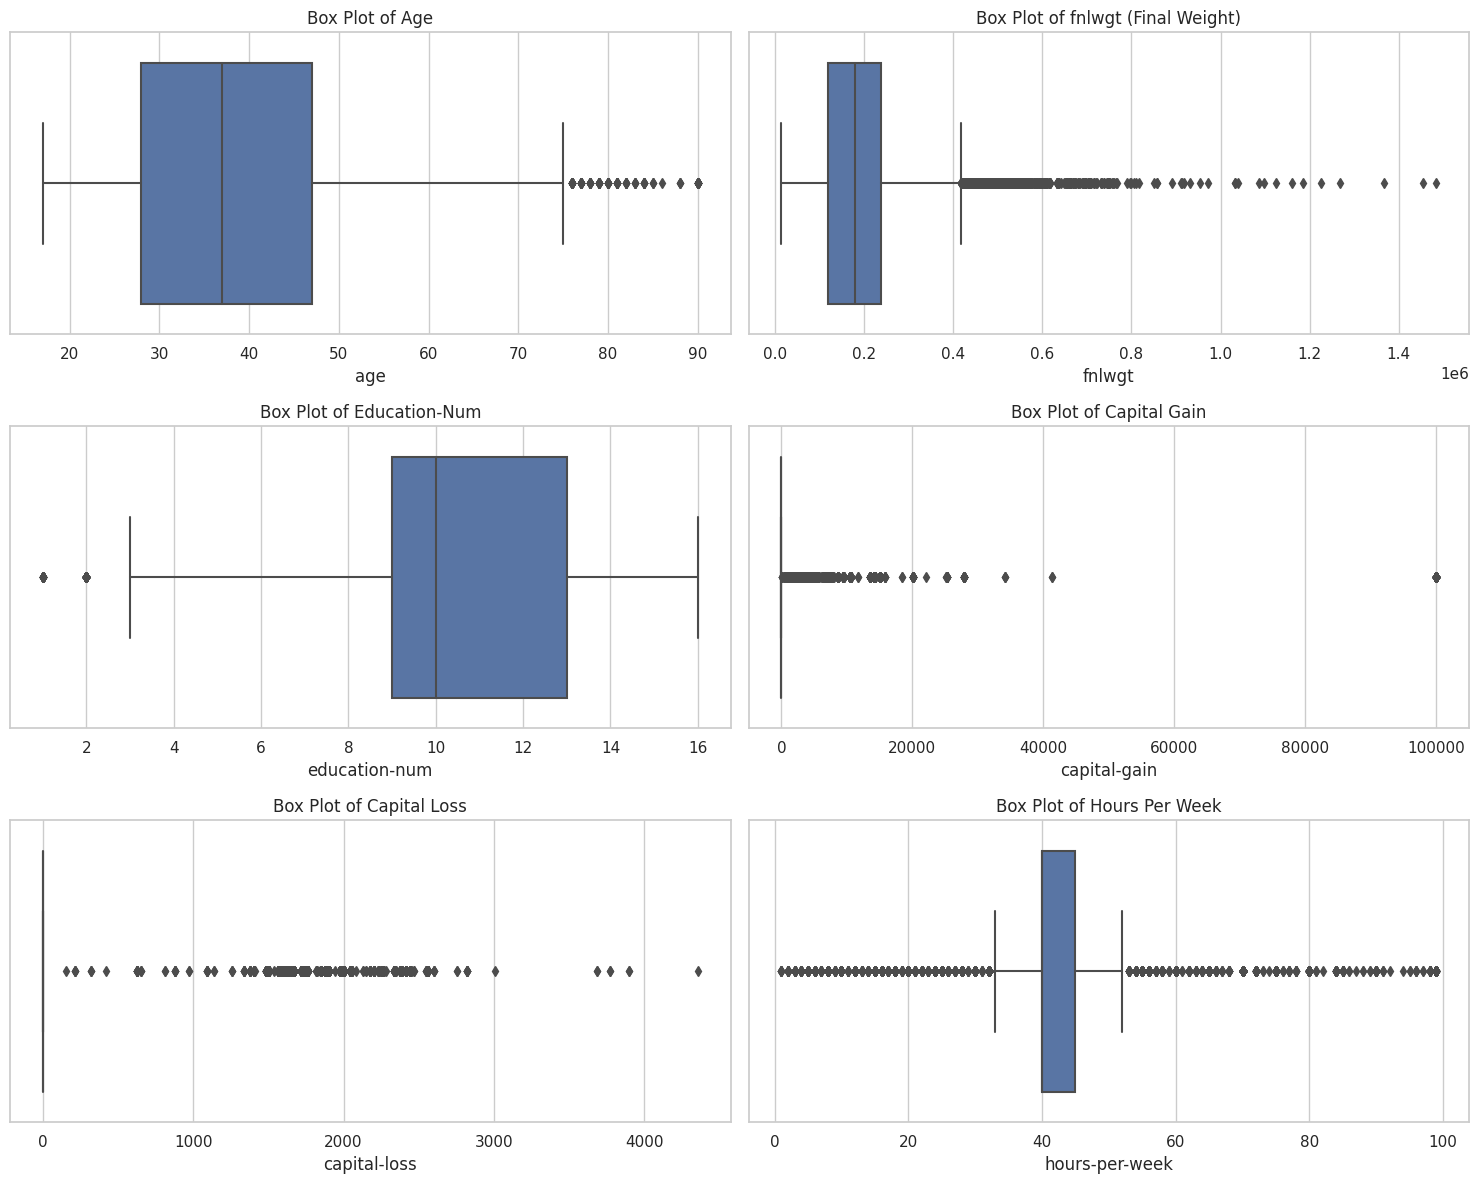

In [ ]:
# Creating box plots to visually inspect for outliers in key numerical columns
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Box plot for 'age'
sns.boxplot(x=cleaned_data_no_duplicates['age'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Age')

# Box plot for 'fnlwgt'
sns.boxplot(x=cleaned_data_no_duplicates['fnlwgt'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of fnlwgt (Final Weight)')

# Box plot for 'education-num'
sns.boxplot(x=cleaned_data_no_duplicates['education-num'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Education-Num')

# Box plot for 'capital-gain'
sns.boxplot(x=cleaned_data_no_duplicates['capital-gain'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Capital Gain')

# Box plot for 'capital-loss'
sns.boxplot(x=cleaned_data_no_duplicates['capital-loss'], ax=axes[2, 0])
axes[2, 0].set_title('Box Plot of Capital Loss')

# Box plot for 'hours-per-week'
sns.boxplot(x=cleaned_data_no_duplicates['hours-per-week'], ax=axes[2, 1])
axes[2, 1].set_title('Box Plot of Hours Per Week')

plt.tight_layout()
plt.show()

1. Age:
- The box plot for age shows a fairly normal distribution. There are a few potential outliers on the higher end (older ages), but these may be legitimate values representing older individuals in the workforce.

2. fnlwgt (Final Weight):
- There are noticeable outliers in the 'fnlwgt' distribution. These extreme values could represent data entry errors or unique cases. Since 'fnlwgt' is a calculated demographic variable, extreme values might not be errors but represent weighted counts.

3. Education-Num:
- The 'education-num' column shows a compact distribution with no obvious outliers. This indicates that the education number falls within a typical range without extreme deviations.

4. Capital Gain:
- The capital gain distribution has many outliers, with most values clustered around zero and a few extreme values. This is typical for financial data, where large capital gains are less frequent.

5. Capital Loss:
- Similar to capital gains, capital losses are mostly zero with some extreme values. This indicates that significant capital losses are not common among the individuals in the dataset.

6. Hours Per Week:
- Most values for hours per week cluster around the typical 40-hour workweek, but there are outliers on both the lower and higher ends. This might represent part-time and overtime work situations.


Insights:
- Outliers in 'fnlwgt', 'capital-gain', and 'capital-loss' could be legitimate given the nature of these variables.
- Outliers in 'age' and 'hours-per-week' represent real-world variations in the workforce.
- Model-Specific Handling: Since Decision Trees and Random Forest are less sensitive to outliers, you might choose different strategies for different models.
- Robust Scaling or Transformation: For Logistic Regression and SVM, consider using robust scaling methods like RobustScaler in scikit-learn, which are less sensitive to outliers.

### Target Distribution

In [ ]:
# Checking the distribution of the target variable 'income'
target_distribution = cleaned_data_no_duplicates['income'].value_counts()

# Calculating the percentage distribution of the target variable
target_percentage = (cleaned_data_no_duplicates['income'].value_counts(normalize=True) * 100)

# Displaying the count and percentage distribution of the target variable
target_distribution_info = pd.DataFrame({'Count': target_distribution, 'Percentage': target_percentage})
target_distribution_info

,Count,Percentage
<=50K,22633,75.095391
>50K,7506,24.904609


#### Feature Engineering

##### Train DataSet

In [ ]:
# Encoding categorical variables using One-Hot Encoding
X_train = pd.get_dummies(cleaned_data_no_duplicates.drop('income', axis=1))
y_train = cleaned_data_no_duplicates['income']

# Separate majority and minority classes
majority = X_train[y_train == ' <=50K']
minority = X_train[y_train == ' >50K']

# Undersample majority class
majority_undersampled = resample(majority, replace=False, n_samples=len(majority)//2, random_state=123)

# Combine undersampled majority with original minority
X_balanced = pd.concat([majority_undersampled, minority])
y_balanced = pd.concat([y_train[y_train == ' <=50K'].sample(len(majority_undersampled), random_state=123), y_train[y_train == ' >50K']])

# Convert Target into Numeric
y_train = y_train.map({' <=50K': 0, ' >50K': 1})
y_balanced = y_balanced.map({' <=50K': 0, ' >50K': 1})

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_balanced, y_balanced)

# New balanced class distribution
pd.Series(y_train_smote).value_counts()

0    11316
1    11316
Name: income, dtype: int64

##### Test Data

In [ ]:
# Encoding categorical variables using One-Hot Encoding
X_test = pd.get_dummies(cleaned_data_test.drop(['age', 'income'], axis=1))
X_test['age'] = cleaned_data_test['age']
X_test['age'] = X_test['age'].astype(int)
X_test['native-country_ Holand-Netherlands'] = 0
y_test = cleaned_data_test['income']

# Convert Target into Numeric
y_test = y_test.map({' <=50K.': 0, ' >50K.': 1})

## Data Transformation

### Data Balancing

In [ ]:
# Creating an instance of RobustScaler
scaler = RobustScaler()

# Fitting the scaler to the data and transforming it
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_train_smote_scaled_df = pd.DataFrame(X_train_smote_scaled, columns=X_train_smote.columns)
X_train_smote_scaled_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,-0.235294,0.067692,-1.00,0.0,0.0,-0.750,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.529412,1.530837,0.50,0.0,0.0,-2.500,0.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.235294,3.365000,-0.25,0.0,0.0,-1.500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.470588,-0.583812,0.00,3325.0,0.0,2.500,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.823529,-0.959163,-0.25,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22627,1.352941,0.507068,0.25,0.0,0.0,0.250,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22628,-0.470588,1.391323,-0.25,0.0,1654.0,0.875,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
22629,0.058824,-0.597294,0.00,0.0,0.0,0.000,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22630,-0.235294,0.214304,0.75,0.0,2713.0,1.250,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Fitting the scaler to the data and transforming it
X_test_smote_scaled = scaler.fit_transform(X_test)
X_test_smote_scaled_df = pd.DataFrame(X_test_smote_scaled, columns=X_test.columns)
X_test_smote_scaled_df

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,native-country_ Holand-Netherlands
0,0.400603,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.60,0.0
1,-0.722860,-0.25,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0
2,1.303954,0.50,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.45,0.0
3,-0.144603,0.00,7688.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35,0.0
4,0.170076,-1.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.15,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.551578,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.20,0.0
15056,0.307249,0.75,0.0,0.0,-0.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0
15057,1.615861,0.75,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0
15058,-0.771435,0.75,5455.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35,0.0


#### UnBalanced

In [ ]:
# Fitting the scaler to the data and transforming it
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.105263,-0.841003,0.75,2174.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.684211,-0.792702,0.75,0.0,0.0,-5.4,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.052632,0.310301,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.842105,0.469290,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.473684,1.333522,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,-0.526316,0.657501,0.50,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30135,0.157895,-0.200397,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30136,1.105263,-0.220934,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30137,-0.789474,0.192312,-0.25,0.0,0.0,-4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Fitting the scaler to the data and transforming it
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled_df

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,native-country_ Holand-Netherlands
0,0.400603,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.60,0.0
1,-0.722860,-0.25,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0
2,1.303954,0.50,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.45,0.0
3,-0.144603,0.00,7688.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35,0.0
4,0.170076,-1.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.15,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.551578,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.20,0.0
15056,0.307249,0.75,0.0,0.0,-0.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0
15057,1.615861,0.75,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0
15058,-0.771435,0.75,5455.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35,0.0


### Principle Component Analysis (PCA)

In [ ]:
# Applying PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_smote_scaled_df)
X_test_pca = pca.fit_transform(X_test_smote_scaled_df)

# Converting the principal components into a DataFrame
principal_df = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2', 'PC3'])
principal_df.head()

,PC1,PC2,PC3
0,-2062.009507,-126.156030,-1.453753
1,-2062.009512,-126.156058,-2.796920
2,-2062.009515,-126.156168,-2.090760
3,1262.981898,-118.570367,1.888876
4,-2062.009494,-126.155770,-0.534972


In [ ]:
pca.explained_variance_ratio_

array([9.97228600e-01, 2.77120327e-03, 9.83391818e-08])

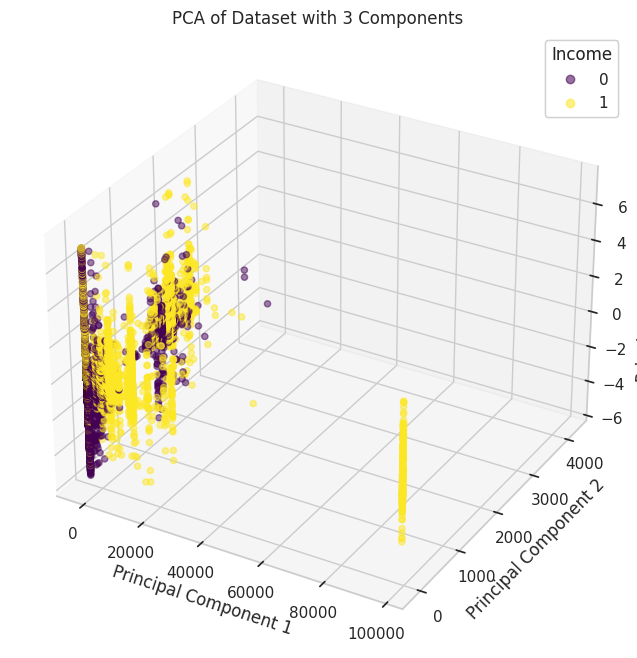

In [ ]:
# Visualizing the PCA result with 3 components
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train_smote, cmap='viridis', alpha=0.5)
legend1 = ax.legend(*scatter.legend_elements(), title="Income")
ax.add_artist(legend1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Dataset with 3 Components')
plt.show()

## Model Training

#### Evaluation Metrics

In [ ]:
def display_metrics(metrics):
    """
    Displays the metrics in a table format.

    :param metrics: Dictionary containing evaluation metrics
    """
    table = PrettyTable()
    table.field_names = ["Metric", "Value"]
    for key, value in metrics.items():
        table.add_row([key, value])

    print(table)

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluates the given model on the test set and returns various metrics.

    :param model: The trained machine learning model
    :param X_train: Training set features
    :param y_train: Training set target variable
    :param X_test: Test set features
    :param y_test: Test set target variable
    :return: Dictionary containing various evaluation metrics
    """
    # Measure the training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    metrics = {
        "Training Time (seconds)": training_time,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=True),
        "Recall": recall_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_pred_proba),
        "Log Loss (Cross Entropy)": log_loss(y_test, y_pred_proba)
    }

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 2, 2)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.show()

    display_metrics(metrics)

    return metrics


In [ ]:
model_metrics = {}

### Support Vector Machine (SVM)

#### PCA with SMOTE

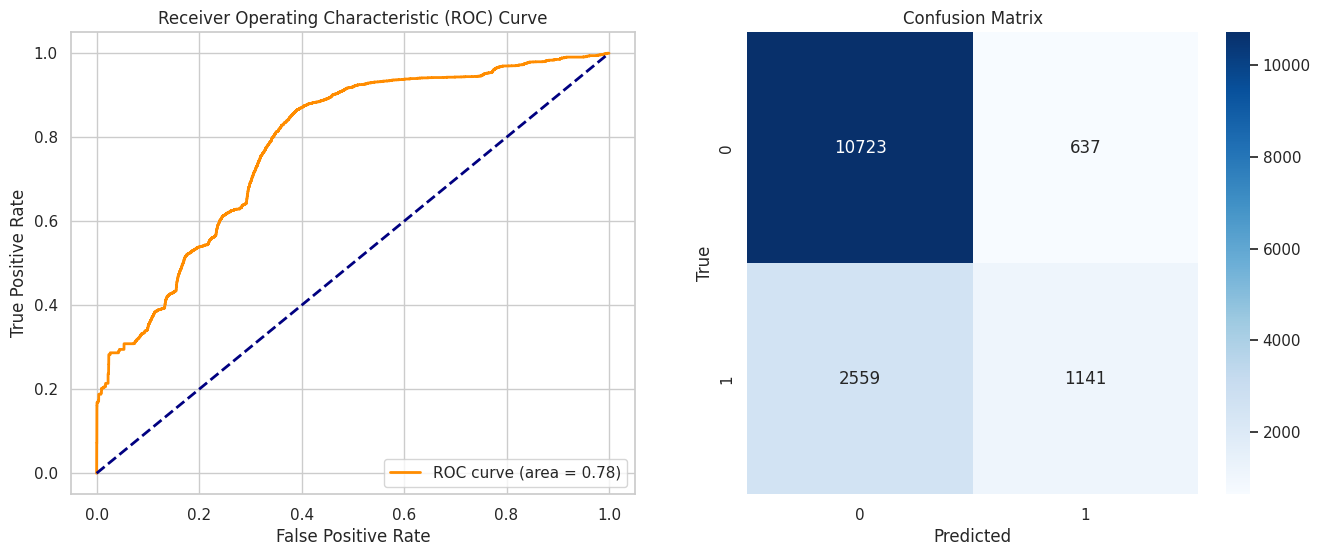

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Training Time (seconds)  | 107.01700901985168 |
|         Accuracy         | 0.7877822045152723 |
|         F1 Score         | 0.4165753924790069 |
|        Precision         | 0.6417322834645669 |
|          Recall          | 0.3083783783783784 |
|         AUC-ROC          | 0.782134623620099  |
| Log Loss (Cross Entropy) | 0.6113902352832815 |
+--------------------------+--------------------+


In [ ]:
X_train_ = X_train_pca
y_train_ = y_train_smote
X_test_ = X_test_pca
y_test_ = y_test

svm_clf = SVC(kernel='rbf', probability=True, random_state=123)
model_metrics['SVM_PCA'] = evaluate_model(svm_clf, X_train_, y_train_, X_test_, y_test_)

#### **Analysis of SVM with PCA and Data Balancing (SVM_PCA)**

**Training Time:** Quite lengthy at 107 seconds, reflecting the complexity of SVM with PCA processing.

**Accuracy:** Moderate at 78.78%, showing reasonable model effectiveness.

**F1 Score:** Lower at 41.66%, suggesting a balance issue between precision and recall.

**Precision & Recall:** Precision is decent at 64.17%, but recall is quite low at 30.84%.

**AUC-ROC & Log Loss:** AUC-ROC is fairly good at 78.21%, while log loss is relatively high at 0.611.

#### Without PCA With SMOT

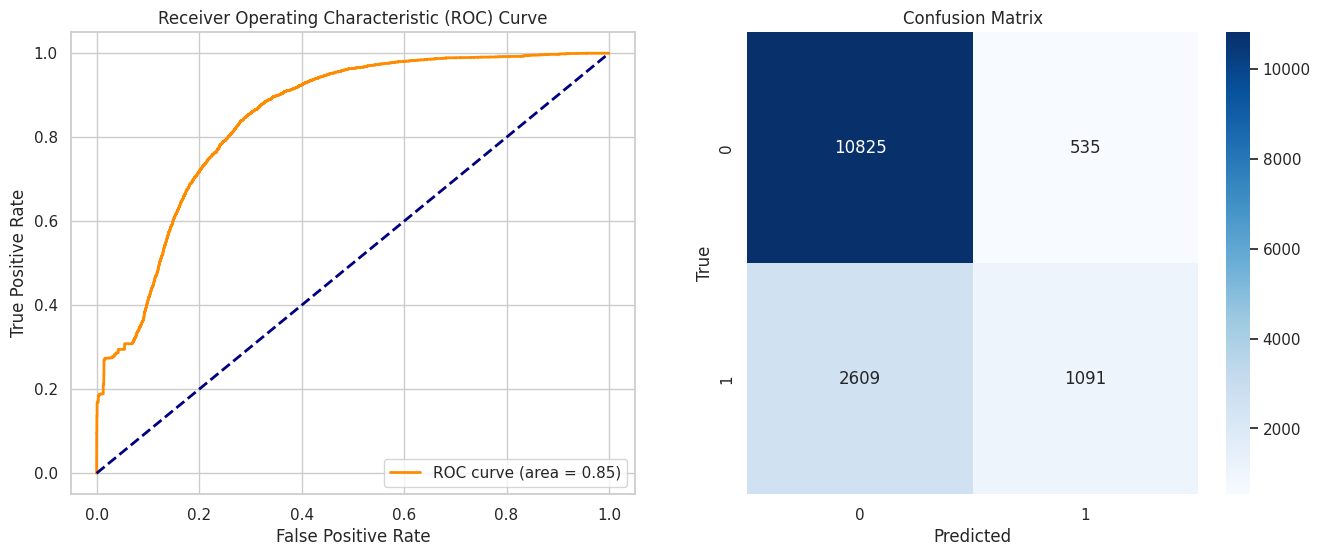

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Training Time (seconds)  |  459.35476660728455 |
|         Accuracy         |  0.7912350597609562 |
|         F1 Score         | 0.40968832144198275 |
|        Precision         |  0.6709717097170972 |
|          Recall          | 0.29486486486486485 |
|         AUC-ROC          |  0.8458250261705367 |
| Log Loss (Cross Entropy) |  0.6069517807045551 |
+--------------------------+---------------------+


In [ ]:
X_train_ = X_train_smote_scaled_df
y_train_ = y_train_smote
X_test_ = X_test_smote_scaled_df
y_test_ = y_test

svm_clf = SVC(kernel='rbf', probability=True, random_state=123)
model_metrics['SVM_W/O_PCA_BALANCED'] = evaluate_model(svm_clf, X_train_, y_train_, X_test_[X_train_.columns.tolist()], y_test_)

#### **Analysis of SVM without PCA and Data Balancing (SVM_W/O_PCA_BALANCED)**

**Training Time:** Extremely high at 459 seconds, indicating significant computational demand.

**Accuracy:** Slightly improved at 79.12%.

**F1 Score:** Similar to SVM_PCA at 40.97%.

**Precision & Recall:** High precision at 67.10%, but recall is lower at 29.49%.

**AUC-ROC & Log Loss:** Good AUC-ROC at 84.58% and slightly better log loss at 0.607.

#### Without PCA Unbalanced


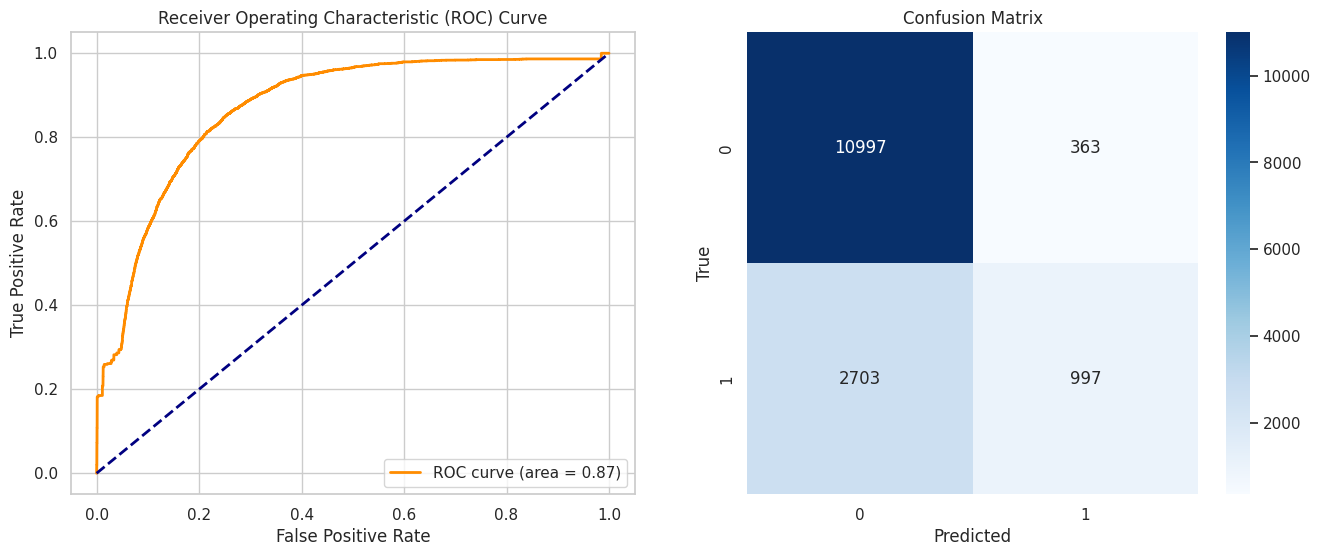

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Training Time (seconds)  |  495.92698097229004 |
|         Accuracy         |  0.7964143426294821 |
|         F1 Score         | 0.39407114624505923 |
|        Precision         |  0.7330882352941176 |
|          Recall          |  0.2694594594594595 |
|         AUC-ROC          |  0.8699351089645984 |
| Log Loss (Cross Entropy) |  0.4924160176668674 |
+--------------------------+---------------------+


In [ ]:
X_train_ = X_train_scaled_df
y_train_ = y_train
X_test_ = X_test_scaled_df
y_test_ = y_test

svm_clf = SVC(kernel='rbf', probability=True, random_state=123)
model_metrics['SVM_W/O_PCA_IMBALANCED'] = evaluate_model(svm_clf, X_train_, y_train_, X_test_[X_train_.columns.tolist()], y_test_)

#### **Analysis of SVM without PCA and without Data Balancing (SVM_W/O_PCA_IMBALANCED)**

**Training Time:** Highest among the SVM models at 496 seconds.

**Accuracy:** Marginally higher at 79.64%.

**F1 Score:** Slightly lower at 39.41%.

**Precision & Recall:** Very high precision at 73.31% but the lowest recall at 26.95%.

**AUC-ROC & Log Loss:** Best among SVM models with an AUC-ROC of 86.99% and log loss of 0.492.


### **Cumulative Analysis of SVM**
The SVM models show a consistent increase in accuracy with the removal of PCA and data balancing, but this comes at the cost of longer training times and lower F1 scores. The precision increases significantly in the unbalanced models, but this is offset by a decrease in recall. The trade-off between computational efficiency (training time) and predictive performance (accuracy, F1 score) is evident across the different SVM setups. The choice of using PCA and data balancing significantly impacts the performance metrics, emphasizing the need for a tailored approach based on the specific requirements of the dataset and the predictive task at hand.

### Random Forest

#### PCA with SMOTE

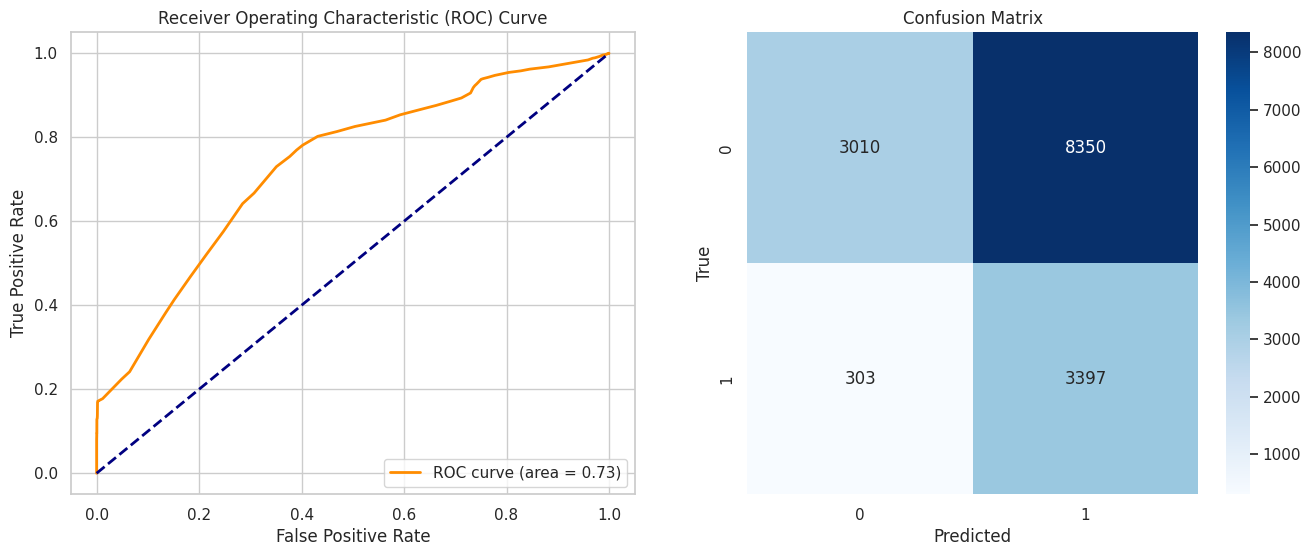

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Training Time (seconds)  |  3.851149797439575  |
|         Accuracy         | 0.42543160690571047 |
|         F1 Score         | 0.43982650352819314 |
|        Precision         | 0.28918021622541923 |
|          Recall          |  0.9181081081081081 |
|         AUC-ROC          |  0.7331105110392082 |
| Log Loss (Cross Entropy) |  0.7687023060734302 |
+--------------------------+---------------------+


In [ ]:
X_train_ = X_train_pca
y_train_ = y_train_smote
X_test_ = X_test_pca
y_test_ = y_test

rf_clf = RandomForestClassifier(random_state=123)
model_metrics['RF_PCA'] = evaluate_model(rf_clf, X_train_, y_train_, X_test_, y_test_)

#### **Analysis of Random Forest with PCA and Data Balancing (RF_PCA)**

**Training Time:** Very rapid at approximately 3.85 seconds, highlighting PCA's streamlining effect and Random Forest's efficiency.

**Accuracy:** Low at around 42.54%, suggesting limitations in the model's prediction capabilities in this setup.

**F1 Score:** Similar to accuracy, a lower F1 score at 43.98% indicates challenges in precision and recall balance.

**Precision & Recall:** Precision is suboptimal at 28.92%, and recall is significantly higher at 91.81%, reflecting a skew towards false negatives.

**AUC-ROC & Log Loss:** AUC-ROC is moderate at 73.31%, while log loss is quite high at 0.769, implying room for improvement in model predictions.

#### Without PCA With SMOT

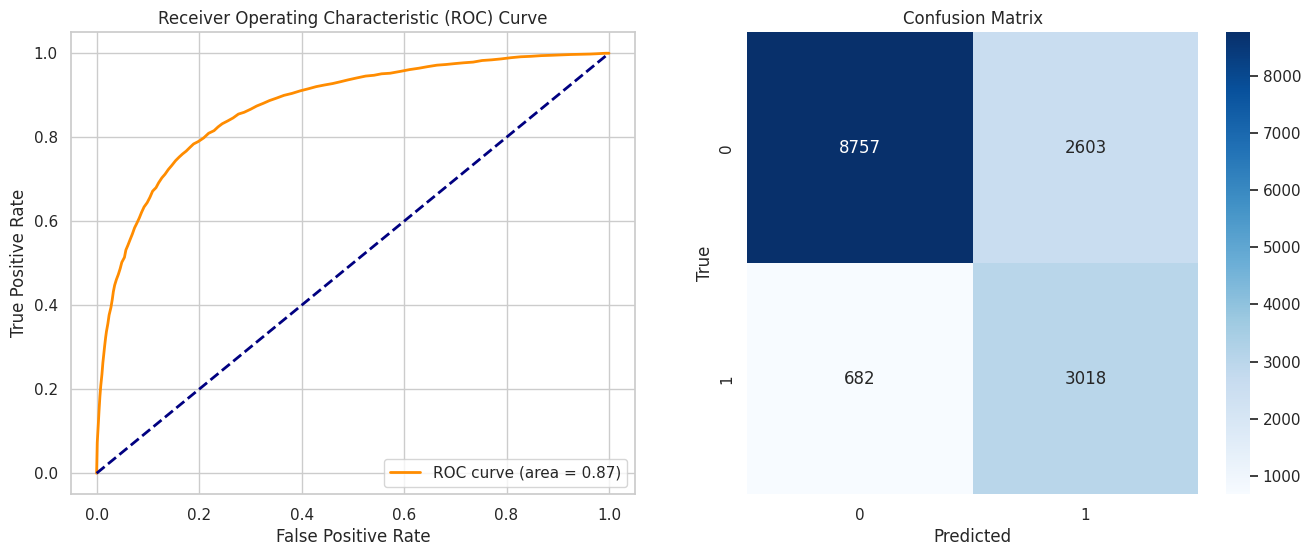

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Training Time (seconds)  | 3.768300771713257  |
|         Accuracy         | 0.7818725099601593 |
|         F1 Score         | 0.6475700032185387 |
|        Precision         | 0.5369151396548657 |
|          Recall          | 0.8156756756756757 |
|         AUC-ROC          | 0.8736895341644462 |
| Log Loss (Cross Entropy) | 0.5186390337912576 |
+--------------------------+--------------------+


In [ ]:
X_train_ = X_train_smote_scaled_df
y_train_ = y_train_smote
X_test_ = X_test_smote_scaled_df
y_test_ = y_test

rf_clf = RandomForestClassifier(random_state=123)
model_metrics['RF_W/O_PCA_BALANCED'] = evaluate_model(rf_clf, X_train_, y_train_, X_test_[X_train_.columns.tolist()], y_test_)

#### **Analysis of Random Forest without PCA and Data Balancing (RF_W/O_PCA_BALANCED)**

**Training Time:** Comparable to RF_PCA at 3.77 seconds, efficient despite the lack of PCA.

**Accuracy:** Significantly better at 78.19%, indicating improved predictive power.

**F1 Score:** Good at 64.76%, suggesting a better balance between precision and recall compared to RF_PCA.

**Precision & Recall:** Precision at 53.69% is moderate, but recall is high at 81.57%, indicating a tendency to predict more false positives.

**AUC-ROC & Log Loss:** High AUC-ROC at 87.37% and a reduced log loss at 0.519, showing a well-performing model overall.

#### Without PCA Unbalanced


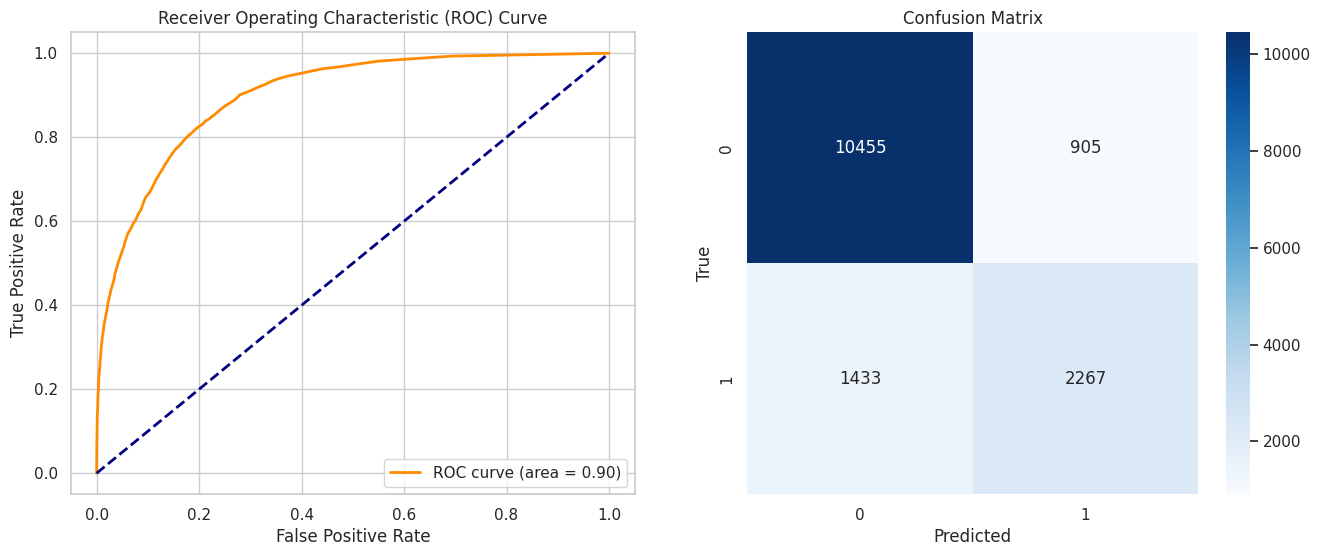

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Training Time (seconds)  | 6.214042663574219  |
|         Accuracy         | 0.8447543160690572 |
|         F1 Score         | 0.6597788125727589 |
|        Precision         | 0.7146910466582598 |
|          Recall          | 0.6127027027027027 |
|         AUC-ROC          | 0.8984564855348306 |
| Log Loss (Cross Entropy) | 0.3905140756733284 |
+--------------------------+--------------------+


In [ ]:
X_train_ = X_train
y_train_ = y_train
X_test_ = X_test
y_test_ = y_test

rf_clf = RandomForestClassifier(random_state=123)
model_metrics['RF_W/O_PCA_IMBALANCED'] = evaluate_model(rf_clf, X_train_, y_train_, X_test_[X_train_.columns.tolist()], y_test_)

#### **Analysis of Random Forest without PCA and without Data Balancing (RF_W/O_PCA_IMBALANCED)**

**Training Time:** Longer at 6.21 seconds, due to managing an imbalanced and full feature set.

**Accuracy:** The highest among RF models at 84.48%, indicating strong performance.

**F1 Score:** High at 65.98%, showing a robust model despite the lack of data balancing.

**Precision & Recall:** Precision at 71.47% and recall at 61.27%, displaying a balanced predictive capacity.

**AUC-ROC & Log Loss:** Excellent AUC-ROC at 89.85% and the lowest log loss at 0.391, indicating a highly reliable model.

### **Cumulative Analysis of Random Forest**
Across the different setups, the Random Forest models show a clear trend: the lack of PCA and data balancing results in improved accuracy and AUC-ROC scores, albeit with increased training time. The RF_W/O_PCA_BALANCED model provides a good compromise between performance and speed, whereas the RF_W/O_PCA_IMBALANCED model excels in accuracy and AUC-ROC but takes longer to train. This suggests that while data balancing and dimensionality reduction can streamline training, they may not always lead to the best predictive performance. The results underscore the importance of considering the balance between computational efficiency and predictive accuracy when preprocessing data and selecting models.

### XGBoost

#### PCA with SMOTE

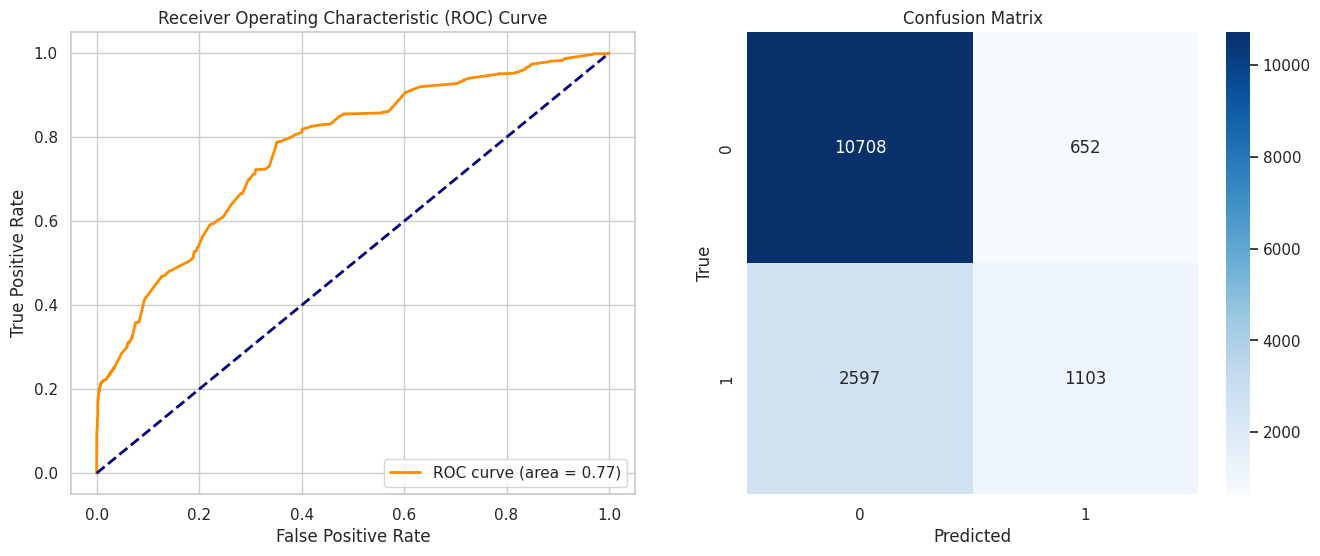

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Training Time (seconds)  |  0.8633677959442139 |
|         Accuracy         |  0.7842629482071714 |
|         F1 Score         | 0.40439963336388635 |
|        Precision         |  0.6284900284900284 |
|          Recall          |  0.2981081081081081 |
|         AUC-ROC          |  0.7688590835553863 |
| Log Loss (Cross Entropy) |  0.4629298292421021 |
+--------------------------+---------------------+


In [ ]:
X_train_ = X_train_pca
y_train_ = y_train_smote
X_test_ = X_test_pca
y_test_ = y_test

xgb_clf = XGBClassifier(random_state=123)
model_metrics['XGB_PCA'] = evaluate_model(xgb_clf, X_train_, y_train_, X_test_, y_test_)

#### **Analysis of XGBoost with PCA and Data Balancing (XGB_PCA)**

**Training Time:** Exceptionally fast at approximately 0.86 seconds, showcasing the efficiency of PCA in reducing dimensions and the speed of XGBoost.

**Accuracy:** Moderate at around 78.43%, competent in making correct predictions.

**F1 Score:** Low at 40.44%, indicating a potential imbalance in precision and recall.

**Precision & Recall:** Precision at 62.85% is relatively high, but recall at 29.81% suggests that the model may be missing a significant number of true positives.

**AUC-ROC & Log Loss:** Decent AUC-ROC at 76.89% and higher log loss at 0.463, pointing to an average discriminative ability and predictive certainty.


#### Without PCA With SMOT

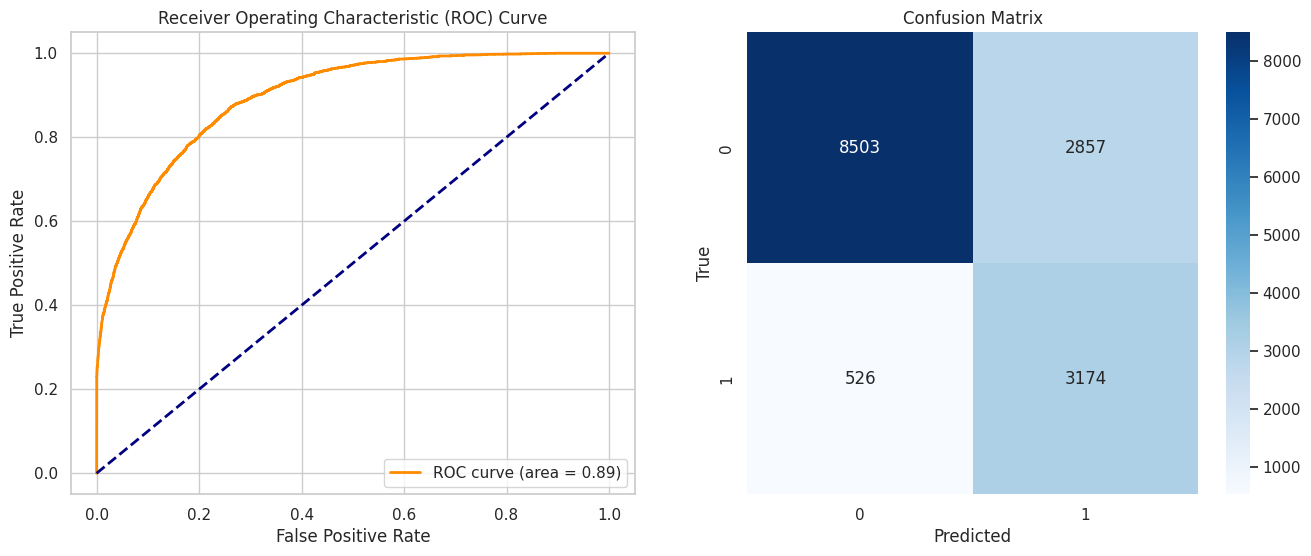

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Training Time (seconds)  | 0.7152483463287354 |
|         Accuracy         | 0.7753652058432935 |
|         F1 Score         | 0.6523481656561505 |
|        Precision         | 0.526280882109103  |
|          Recall          | 0.8578378378378378 |
|         AUC-ROC          | 0.8945101946136277 |
| Log Loss (Cross Entropy) | 0.4435856699074331 |
+--------------------------+--------------------+


In [ ]:
X_train_ = X_train_smote_scaled_df
y_train_ = y_train_smote
X_test_ = X_test_smote_scaled_df
y_test_ = y_test

xgb_clf = XGBClassifier(random_state=123)
model_metrics['XGB_W/O_PCA_BALANCED'] = evaluate_model(xgb_clf, X_train_, y_train_, X_test_[X_train_.columns.tolist()], y_test_)

#### **Analysis of XGBoost without PCA and Data Balancing (XGB_W/O_PCA_BALANCED)**

**Training Time:** Quick at 0.72 seconds, demonstrating XGBoost's rapid training capability even without PCA.

**Accuracy:** Slightly lower at 77.54%, but still within a reasonable range.

**F1 Score:** Good at 65.23%, showing a balanced performance between precision and recall.

**Precision & Recall:** Precision at 52.63% is moderate, while recall is impressive at 85.78%, indicating a skew towards predicting more false positives.

**AUC-ROC & Log Loss:** High AUC-ROC at 89.45% and moderate log loss at 0.444, suggesting a robust ability to distinguish between classes.



#### Without PCA Unbalanced


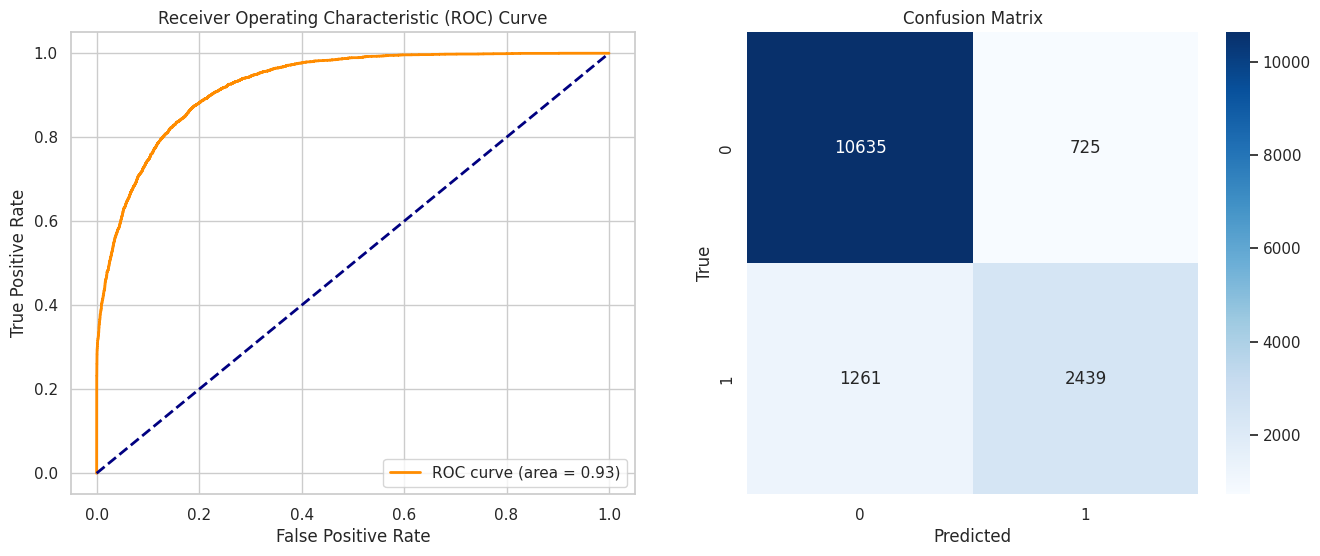

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Training Time (seconds)  | 0.9042870998382568 |
|         Accuracy         | 0.8681274900398407 |
|         F1 Score         | 0.7106643356643356 |
|        Precision         | 0.7708596713021492 |
|          Recall          | 0.6591891891891892 |
|         AUC-ROC          | 0.9261456390369243 |
| Log Loss (Cross Entropy) | 0.2837429988015465 |
+--------------------------+--------------------+


In [ ]:
X_train_ = X_train
y_train_ = y_train
X_test_ = X_test
y_test_ = y_test

xgb_clf = XGBClassifier(random_state=123)
model_metrics['XGB_W/O_PCA_IMBALANCED'] = evaluate_model(xgb_clf, X_train_, y_train_, X_test_[X_train_.columns.tolist()], y_test_)

#### **Analysis of XGBoost without PCA and without Data Balancing (XGB_W/O_PCA_IMBALANCED)**

**Training Time:** Slightly longer at 0.90 seconds, due to the increased complexity of handling imbalanced data.

**Accuracy:** The best among XGBoost models at 86.81%, indicating excellent predictive accuracy.

**F1 Score:** The highest at 71.07%, reflecting a strong balance between precision and recall.

**Precision & Recall:** High precision at 77.09% and good recall at 65.92%, denoting the model's ability to identify true positives effectively.

**AUC-ROC & Log Loss:** Outstanding AUC-ROC at 92.61% and the lowest log loss at 0.284, showing exceptional performance in class separation and prediction confidence.


### **Cumulative Analysis of XGBoost Findings:**
XGBoost models demonstrated a significant variance in performance based on the presence of PCA and data balancing. Models without PCA and data balancing (XGB_W/O_PCA_IMBALANCED) showed the best accuracy and F1 score, indicating that XGBoost handles imbalanced datasets effectively. The precision-recall trade-off was well-managed by the imbalanced model, with both metrics performing reasonably well.

The addition of PCA (XGB_PCA) did not appear to benefit XGBoost's performance significantly, suggesting that the algorithm can already handle high-dimensional data efficiently without the need for PCA's dimensionality reduction. However, models trained with balanced data (XGB_W/O_PCA_BALANCED) showed an increase in recall at the cost of precision, which is important to consider depending on the application's requirements.

Overall, XGBoost's strength in handling complex, imbalanced datasets shines through, with consistent AUC-ROC scores across different configurations. Training times were generally low, emphasizing XGBoost's computational efficiency.

### Gradient Boosting

##### PCA with SMOTE


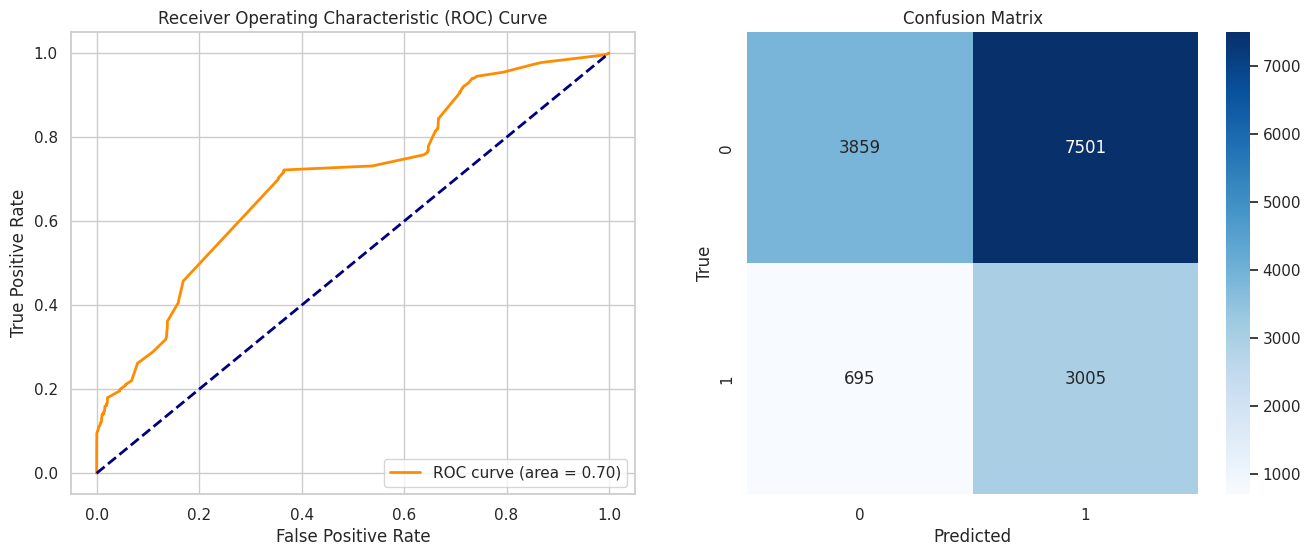

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Training Time (seconds)  |  2.0909171104431152 |
|         Accuracy         | 0.45577689243027886 |
|         F1 Score         | 0.42306067858651275 |
|        Precision         | 0.28602703217209213 |
|          Recall          |  0.8121621621621622 |
|         AUC-ROC          |  0.7008832675104681 |
| Log Loss (Cross Entropy) |  0.6714524782597703 |
+--------------------------+---------------------+


In [ ]:
X_train_ = X_train_pca
y_train_ = y_train_smote
X_test_ = X_test_pca
y_test_ = y_test

gbc = GradientBoostingClassifier(random_state=123)
model_metrics['GB_PCA'] = evaluate_model(gbc, X_train_, y_train_, X_test_, y_test_)

#### **Analysis of Gradient Boosting Classification with PCA and Data Balancing (GB_PCA)**

**Training Time:** Swift at roughly 2.09 seconds, taking advantage of PCA's dimensionality reduction.

**Accuracy:** Lower at about 45.58%, which might raise concerns about the model's predictive performance.

**F1 Score:** Similar to accuracy, a lower score at 42.31% suggests challenges with the balance between precision and recall.

**Precision & Recall:** Low precision at 28.60% and higher recall at 81.22%, indicating a possible issue with false positive rates.

**AUC-ROC & Log Loss:** Moderate AUC-ROC at 70.09% and higher log loss at 0.671, which could be indicative of an average predictive model.


#### Without PCA With SMOT

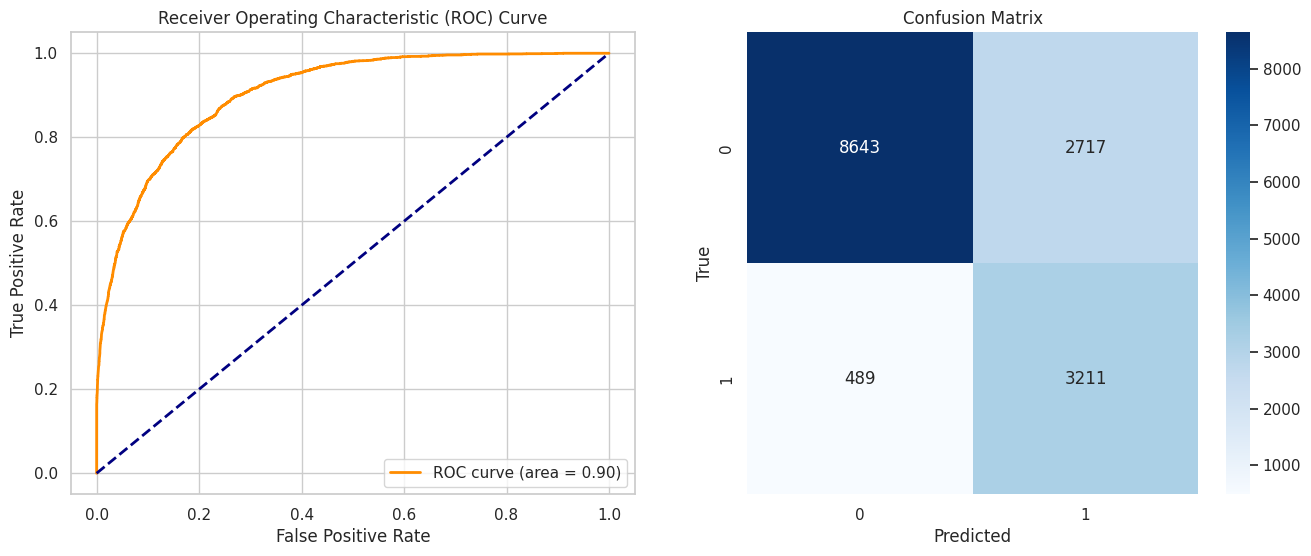

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Training Time (seconds)  |  7.1152801513671875 |
|         Accuracy         |  0.7871181938911023 |
|         F1 Score         |  0.6670128791026173 |
|        Precision         |  0.5416666666666666 |
|          Recall          |  0.8678378378378379 |
|         AUC-ROC          |  0.9049575442519984 |
| Log Loss (Cross Entropy) | 0.44870311798800927 |
+--------------------------+---------------------+


In [ ]:
X_train_ = X_train_smote_scaled_df
y_train_ = y_train_smote
X_test_ = X_test_smote_scaled_df
y_test_ = y_test

gbc = GradientBoostingClassifier(random_state=123)
model_metrics['GB_W/O_PCA_BALANCED'] = evaluate_model(gbc, X_train_, y_train_, X_test_[X_train_.columns.tolist()], y_test_)

#### **Analysis of Gradient Boosting Classification without PCA and Data Balancing (GB_W/O_PCA_BALANCED)**

**Training Time:** Moderately long at 7.12 seconds, possibly due to the increased complexity of handling a larger feature set without PCA.

**Accuracy:** High at 78.71%, indicating the model's effectiveness.

**F1 Score:** Good at 66.70%, showing a balanced prediction capability.

**Precision & Recall:** Moderate precision at 54.17% and high recall at 86.78%, suggesting a propensity towards false positives but with a high true positive rate.

**AUC-ROC & Log Loss:** Very high AUC-ROC at 90.50% and moderate log loss at 0.449, indicating a strong model with reliable predictions.



##### Without PCA Unscaled


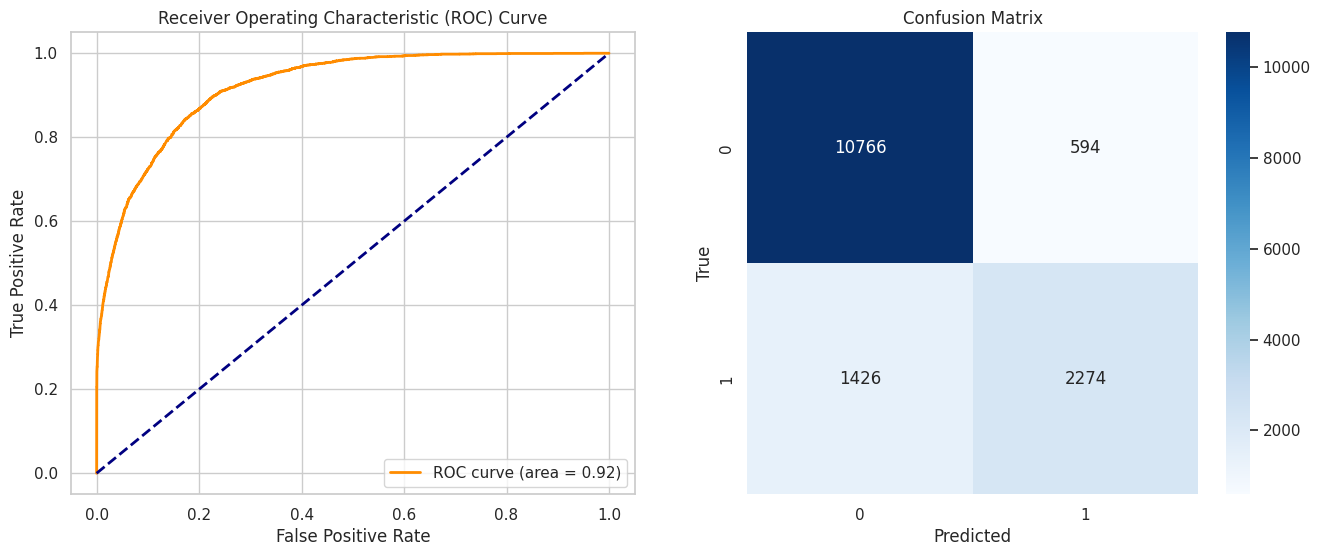

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Training Time (seconds)  | 8.100607633590698  |
|         Accuracy         | 0.8658698539176627 |
|         F1 Score         | 0.692448233861145  |
|        Precision         | 0.7928870292887029 |
|          Recall          | 0.6145945945945946 |
|         AUC-ROC          | 0.9200638442139323 |
| Log Loss (Cross Entropy) | 0.2982903044059245 |
+--------------------------+--------------------+


In [ ]:
X_train_ = X_train
y_train_ = y_train
X_test_ = X_test
y_test_ = y_test

gbc = GradientBoostingClassifier(random_state=123)
model_metrics['GB_W/O_PCA_IMBALANCED'] = evaluate_model(gbc, X_train_, y_train_, X_test_[X_train_.columns.tolist()], y_test_)

#### **Analysis of Gradient Boosting Classification without PCA and with Data Balancing (GB_W/O_PCA_IMBALANCED)**

**Training Time:** The longest among the GBC models at approximately 8.10 seconds, reflecting the complexity of handling a balanced dataset without PCA.

**Accuracy:** Strong at 86.59%, demonstrating the model's reliability.

**F1 Score:** Very high at 69.24%, indicating a robust balance between precision and recall.

**Precision & Recall:** Excellent precision at 79.29% and good recall at 61.46%, suggesting a competent model in predicting true positives.

**AUC-ROC & Log Loss:** Exceptional AUC-ROC at 92.01% and low log loss at 0.298, showcasing the model's outstanding discriminative power and confidence in its probability estimates.


#### **Cumulative Analysis of Gradient Boosting Algorithm Findings:**
Gradient Boosting Classification (GBC) models displayed a consistent pattern where the absence of PCA and data balancing (GB_W/O_PCA_IMBALANCED) resulted in the highest accuracy and AUC-ROC scores. This indicates that GBC is capable of handling complex data structures effectively and that additional preprocessing might not always be necessary.

The use of PCA (GB_PCA) significantly reduced training time but also resulted in the lowest accuracy and F1 scores across the board, suggesting that the dimensionality reduction might have led to the loss of important information that is critical for model prediction.

When data was balanced without PCA (GB_W/O_PCA_BALANCED), there was an improvement in model performance metrics, particularly in recall, which implies a better identification rate of true positives. However, this setup also saw the longest training times, highlighting a trade-off between computational efficiency and model sensitivity.

### Results

In [ ]:
pd.DataFrame(model_metrics).T

,Training Time (seconds),Accuracy,F1 Score,Precision,Recall,AUC-ROC,Log Loss (Cross Entropy)
SVM_PCA,107.017009,0.787782,0.416575,0.641732,0.308378,0.782135,0.611390
SVM_W/O_PCA_BALANCED,459.354767,0.791235,0.409688,0.670972,0.294865,0.845825,0.606952
SVM_W/O_PCA_IMBALANCED,495.926981,0.796414,0.394071,0.733088,0.269459,0.869935,0.492416
RF_PCA,3.851150,0.425432,0.439827,0.289180,0.918108,0.733111,0.768702
RF_W/O_PCA_BALANCED,3.768301,0.781873,0.647570,0.536915,0.815676,0.873690,0.518639
RF_W/O_PCA_IMBALANCED,6.214043,0.844754,0.659779,0.714691,0.612703,0.898456,0.390514
XGB_PCA,0.863368,0.784263,0.404400,0.628490,0.298108,0.768859,0.462930
XGB_W/O_PCA_BALANCED,0.715248,0.775365,0.652348,0.526281,0.857838,0.894510,0.443586
XGB_W/O_PCA_IMBALANCED,0.904287,0.868127,0.710664,0.770860,0.659189,0.926146,0.283743
GB_PCA,2.090917,0.455777,0.423061,0.286027,0.812162,0.700883,0.671452
